### Part A

In [1]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B

# 1.Import Libraries

In [2]:
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,LogisticRegression,BayesianRidge,SGDRegressor,ElasticNet,HuberRegressor,Lasso,PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
import scipy.stats as stat
from xgboost import XGBRegressor
import pylab
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings('ignore')

c:\Users\Aai\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Let's start by reading in the CE802_P3_Data.csv into a pandas dataframe

# 2.The Data 

In [3]:
df = pd.read_csv("CE802_P3_Data.csv")
df.head()

F1       F2     F3     F4        F5    F6       F7      F8         F9  \
0 -190.11   193.53   2.32 -21.84  11289.72    UK  5730.72  638.55  Very high   
1 -257.94  1934.85  24.36 -22.06   2712.12    UK  3509.94  389.53       High   
2 -426.06  1071.87   0.10 -21.80   7469.01   USA  4633.20  -28.63     Medium   
3 -204.48  1533.96   7.42 -17.94   4261.77  Rest  3516.06  335.36  Very high   
4 -232.08  1334.88  29.48 -19.88   2941.02  Rest  3592.04  -46.68   Very low   

      F10  ...     F28       F29     F30  F31     F32    F33      F34  F35  \
0  467.97  ...  174.81  23994.54  261.69    5 -177.15  17.60 -1437.20    4   
1  393.42  ...  265.44  11554.06  205.14    4 -377.55  16.32 -1840.92    7   
2  226.62  ...  542.94  28254.56  363.93    5 -293.67  17.64 -1207.92    5   
3  912.63  ...  527.10  21449.30   23.31    4 -295.80  20.44  -139.58    6   
4  601.41  ...  390.48  18060.98  248.79    3 -222.12  19.39 -2130.02    4   

      F36   Target  
0  178.20  1306.29  
1   83.53  -118.07  
2  218.54  -708.14  
3  154.74  2918.75  
4  178.77  1113.09  

[5 rows x 37 columns]

# 3.Exploratory Data Analysis:
    
Let's us begin some exploratory data analysis! we'll start by checking out missing data!

# A. Missing Data

we will be using plottly & seaborn to create some visulisation to see where we are missing the data.

In [4]:
# using info() methods we get the information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   object 
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [5]:
# the describe() method will shows us, the summary statistic of the dataframe provided.
df.describe()

F1           F2            F3           F4            F5  \
count  1500.000000  1500.000000   1500.000000  1500.000000   1500.000000   
mean   -225.819980  1685.929500    147.677373   -19.898040   6936.968600   
std     123.556939   897.768521   1407.814521     5.582196   9055.633907   
min    -805.710000 -1390.290000      0.000000   -46.700000 -27345.270000   
25%    -286.635000  1098.450000      0.280000   -22.270000   1192.050000   
50%    -224.655000  1687.905000      2.170000   -18.580000   6834.300000   
75%    -159.330000  2268.270000     15.965000   -15.875000  13035.727500   
max     372.540000  5376.600000  45417.440000   -12.160000  38759.970000   

                F7           F8         F10          F11          F12  ...  \
count  1500.000000  1500.000000  1500.00000  1500.000000  1500.000000  ...   
mean   3719.969307   122.016013   485.85732  -262.875180  -575.086313  ...   
std     866.528782   293.951559   133.08227   123.323382   295.642000  ...   
min    -367.260000  -973.900000  -291.45000  -784.020000 -1408.160000  ...   
25%    3277.760000   -73.112500   424.32750  -325.545000  -776.855000  ...   
50%    3738.080000   129.180000   483.64500  -262.095000  -567.300000  ...   
75%    4150.370000   307.732500   550.58250  -201.067500  -377.802500  ...   
max    8180.040000  1048.690000  1103.16000   311.430000   394.840000  ...   

               F28           F29          F30          F31          F32  \
count  1500.000000   1500.000000  1500.000000  1500.000000  1500.000000   
mean    303.455360  21382.406027   243.789220     3.969333  -317.830500   
std     123.465886   5843.806180   126.902301     1.829378    91.058919   
min    -331.440000   3933.000000  -522.660000     0.000000  -653.580000   
25%     242.790000  17501.705000   179.857500     3.000000  -376.230000   
50%     304.320000  21356.350000   242.655000     4.000000  -319.545000   
75%     365.835000  25296.390000   305.602500     5.000000  -253.957500   
max     886.050000  43216.100000   923.910000    10.000000   -31.920000   

               F33          F34          F35          F36       Target  
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000  
mean     19.908207 -1430.911520     3.977333   172.264747   856.493547  
std       4.227795   595.115533     1.755812    43.285665  1222.860406  
min      -1.870000 -3353.560000     0.000000    -9.560000 -2685.920000  
25%      17.902500 -1832.925000     3.000000   149.480000    17.235000  
50%      19.885000 -1442.250000     4.000000   171.615000   624.735000  
75%      21.955000 -1025.335000     5.000000   193.570000  1609.167500  
max      46.020000   687.640000    11.000000   380.540000  3836.440000  

[8 rows x 35 columns]

In [6]:
# Here, we will use Unique method to find the unique in series object.

print(df['F6'].unique())

['UK' 'USA' 'Rest' 'Europe']


In [7]:
# In this section we have use 2 methods first is groupby :A groupby operation involves some combination of splitting the object, applying a function, and combining the results. 
# And the second method is nunique which return number of unique elements in the object.
count_unique1 = df.groupby('F6')['Target'].nunique()   # Apply unique function
print(count_unique1)

F6
Europe    364
Rest      378
UK        393
USA       364
Name: Target, dtype: int64


In [8]:
mapping = {'UK':0,'USA':1,'Rest':2,'Europe':3}
df['F6'] = df['F6'].replace(mapping)


In [9]:
df['F6'].head(10)

0    0
1    0
2    1
3    2
4    2
5    3
6    3
7    3
8    0
9    1
Name: F6, dtype: int64

In [10]:
df['F9'].unique()

array(['Very high', 'High', 'Medium', 'Very low', 'Low'], dtype=object)

In [11]:
count_unique2 = df.groupby('F9')['Target'].nunique()   # Apply unique function
print(count_unique2)

F9
High         307
Low          286
Medium       294
Very high    306
Very low     306
Name: Target, dtype: int64


In [12]:
mapping1 = {'Very high':0,'High':1,'Medium':2,'Very low':3,'Low':4}
df['F9'] = df['F9'].replace(mapping1,inplace=False)


In [13]:
df['F9'].tail()

1495    1
1496    1
1497    0
1498    3
1499    2
Name: F9, dtype: int64

In [14]:
df.head()

F1       F2     F3     F4        F5  F6       F7      F8  F9     F10  \
0 -190.11   193.53   2.32 -21.84  11289.72   0  5730.72  638.55   0  467.97   
1 -257.94  1934.85  24.36 -22.06   2712.12   0  3509.94  389.53   1  393.42   
2 -426.06  1071.87   0.10 -21.80   7469.01   1  4633.20  -28.63   2  226.62   
3 -204.48  1533.96   7.42 -17.94   4261.77   2  3516.06  335.36   0  912.63   
4 -232.08  1334.88  29.48 -19.88   2941.02   2  3592.04  -46.68   3  601.41   

   ...     F28       F29     F30  F31     F32    F33      F34  F35     F36  \
0  ...  174.81  23994.54  261.69    5 -177.15  17.60 -1437.20    4  178.20   
1  ...  265.44  11554.06  205.14    4 -377.55  16.32 -1840.92    7   83.53   
2  ...  542.94  28254.56  363.93    5 -293.67  17.64 -1207.92    5  218.54   
3  ...  527.10  21449.30   23.31    4 -295.80  20.44  -139.58    6  154.74   
4  ...  390.48  18060.98  248.79    3 -222.12  19.39 -2130.02    4  178.77   

    Target  
0  1306.29  
1  -118.07  
2  -708.14  
3  2918.75  
4  1113.09  

[5 rows x 37 columns]

# 4.Feature Scaling.

In [15]:
##Here,we are finding the correleation with dependent features vs  independent features.
df.corr()

F1        F2        F3        F4        F5        F6        F7  \
F1      1.000000  0.016518 -0.012547 -0.071082 -0.045068 -0.064591 -0.052404   
F2      0.016518  1.000000  0.001428 -0.021691 -0.052275  0.030361  0.023047   
F3     -0.012547  0.001428  1.000000  0.006564 -0.010488  0.004363 -0.011525   
F4     -0.071082 -0.021691  0.006564  1.000000  0.005731  0.000564 -0.009437   
F5     -0.045068 -0.052275 -0.010488  0.005731  1.000000 -0.053698  0.016429   
F6     -0.064591  0.030361  0.004363  0.000564 -0.053698  1.000000  0.021702   
F7     -0.052404  0.023047 -0.011525 -0.009437  0.016429  0.021702  1.000000   
F8     -0.018044  0.001726  0.034057  0.014663  0.021096 -0.062089 -0.018073   
F9     -0.014506 -0.006086 -0.021255  0.030113  0.002843  0.004241 -0.017170   
F10     0.001610 -0.021172 -0.039046 -0.015096 -0.018190  0.021185 -0.001327   
F11    -0.031368  0.030663  0.001780 -0.000790  0.044879  0.028849  0.044032   
F12    -0.056409 -0.014746 -0.005172  0.020638 -0.028834  0.028422  0.039682   
F13    -0.002600  0.019350  0.045850  0.024265 -0.011481 -0.032094  0.036767   
F14     0.009168  0.039093  0.038511 -0.012488 -0.018259 -0.033294  0.051589   
F15    -0.041621 -0.013028 -0.028722  0.062916  0.047202  0.001586 -0.028102   
F16     0.012129 -0.022430  0.012447 -0.024505  0.040660 -0.011416 -0.007537   
F17    -0.004340  0.000665 -0.026167 -0.057645 -0.090960  0.003205  0.017642   
F18    -0.002746 -0.007120  0.012984  0.009762 -0.005585  0.006715  0.080132   
F19     0.010717 -0.044274 -0.023425  0.071100 -0.002121 -0.021158  0.029890   
F20    -0.006842 -0.009724 -0.055140 -0.054602  0.027364  0.049209  0.009511   
F21    -0.054669 -0.016651 -0.011244  0.023032  0.025202  0.043163 -0.024834   
F22    -0.031747  0.021399 -0.044933 -0.033954  0.001440 -0.011570  0.006780   
F23     0.022513  0.033707  0.015815  0.035647  0.047669 -0.011711  0.015483   
F24    -0.018772 -0.059178 -0.001447 -0.019184  0.035496  0.015406 -0.013936   
F25     0.044625  0.054417  0.020675 -0.000019  0.028856  0.013349 -0.043326   
F26    -0.025299 -0.008872  0.000784 -0.026947  0.001398  0.044713  0.004333   
F27     0.018549 -0.000895  0.025431  0.035882  0.001450 -0.003036  0.002516   
F28     0.032989 -0.014616  0.005030  0.016152  0.025734  0.005720 -0.009844   
F29    -0.000981  0.021363  0.008905 -0.057363  0.014081  0.005710  0.009476   
F30    -0.052164 -0.030399 -0.015975 -0.017902  0.027860  0.031492 -0.022678   
F31     0.023099  0.055225 -0.006496 -0.013915 -0.017552  0.009069 -0.021710   
F32    -0.030952 -0.020058 -0.004091 -0.021132  0.020545 -0.015629  0.023425   
F33     0.005287 -0.009539  0.006115 -0.017381 -0.022243 -0.030911  0.010559   
F34     0.001155  0.035298 -0.004316  0.022358 -0.003659  0.040121  0.027667   
F35     0.014196  0.039338 -0.014514  0.001385  0.010405 -0.009404 -0.035053   
F36     0.013175  0.087653  0.129549  0.002014 -0.003888 -0.008078  0.004716   
Target -0.082510  0.293027  0.106413  0.463560 -0.004574 -0.025753  0.054768   

              F8        F9       F10  ...       F28       F29       F30  \
F1     -0.018044 -0.014506  0.001610  ...  0.032989 -0.000981 -0.052164   
F2      0.001726 -0.006086 -0.021172  ... -0.014616  0.021363 -0.030399   
F3      0.034057 -0.021255 -0.039046  ...  0.005030  0.008905 -0.015975   
F4      0.014663  0.030113 -0.015096  ...  0.016152 -0.057363 -0.017902   
F5      0.021096  0.002843 -0.018190  ...  0.025734  0.014081  0.027860   
F6     -0.062089  0.004241  0.021185  ...  0.005720  0.005710  0.031492   
F7     -0.018073 -0.017170 -0.001327  ... -0.009844  0.009476 -0.022678   
F8      1.000000  0.005765 -0.011190  ...  0.009740  0.006491 -0.003847   
F9      0.005765  1.000000 -0.018353  ... -0.034420  0.003587  0.022011   
F10    -0.011190 -0.018353  1.000000  ... -0.031223  0.049303 -0.018291   
F11     0.047391 -0.026074 -0.017487  ...  0.013157  0.012524  0.011514   
F12     0.002406  0.051926 -0.005637  ...  0.005037  0.049937 -0.020273  

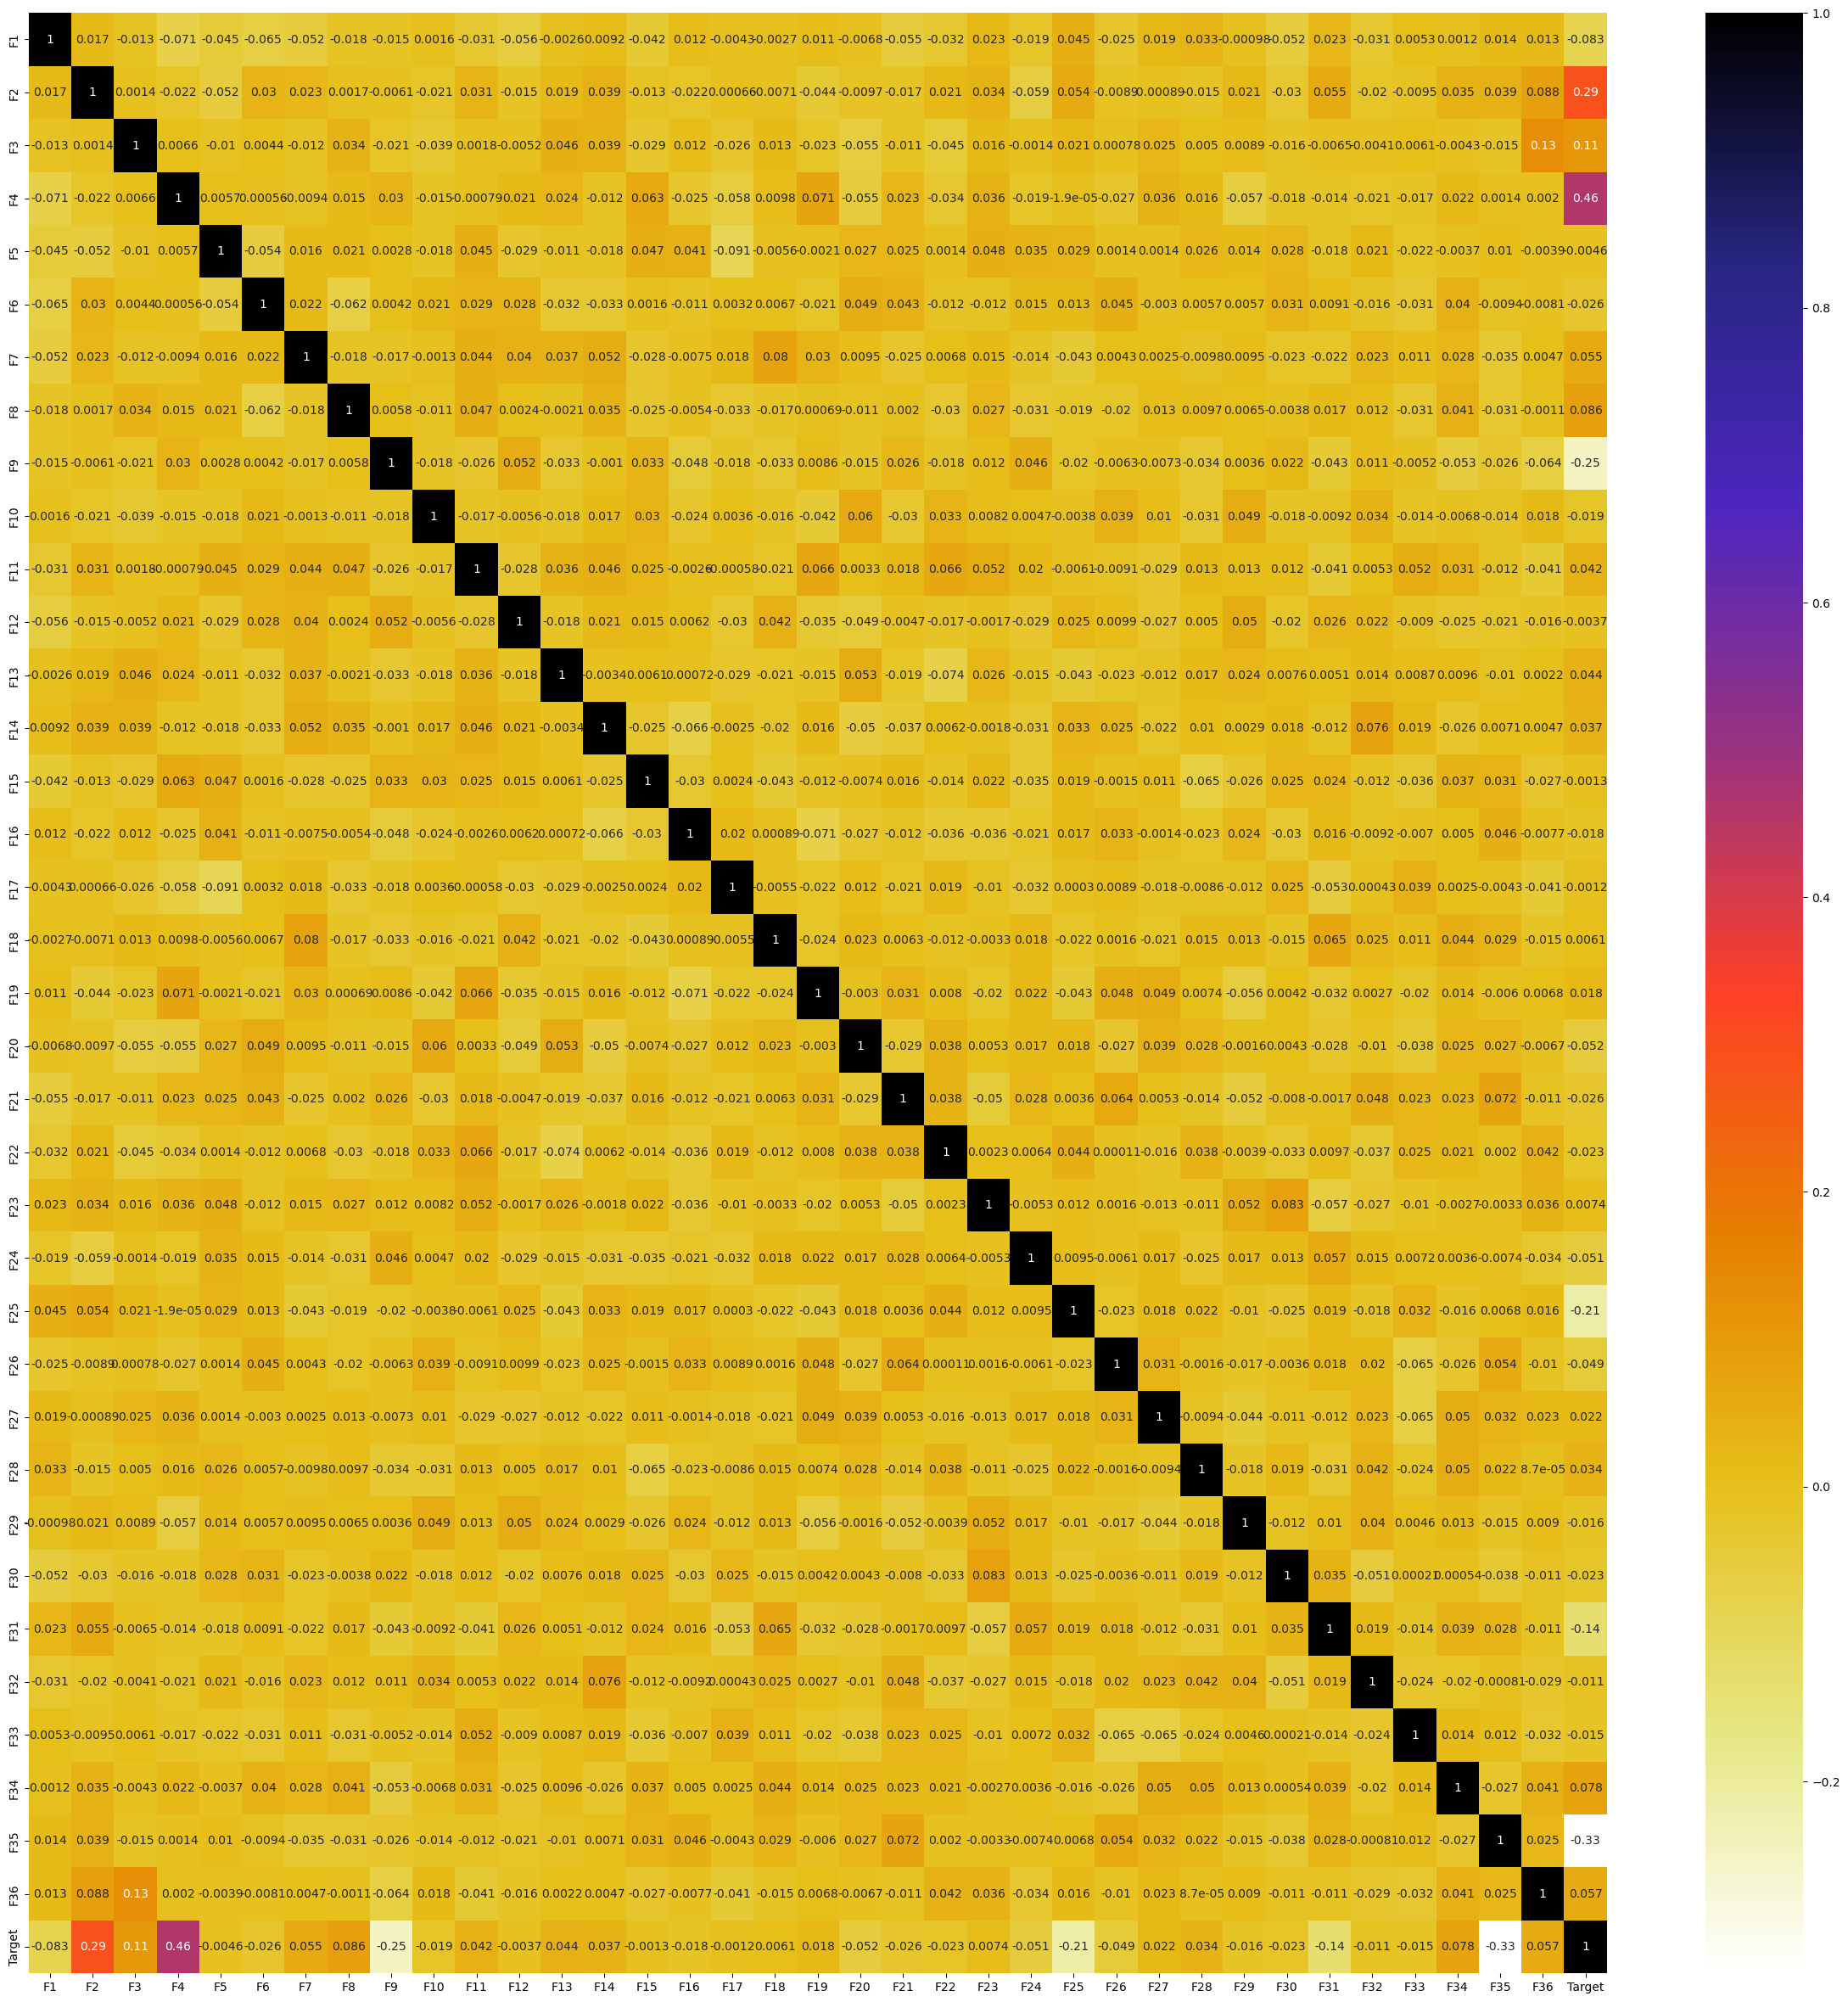

In [16]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

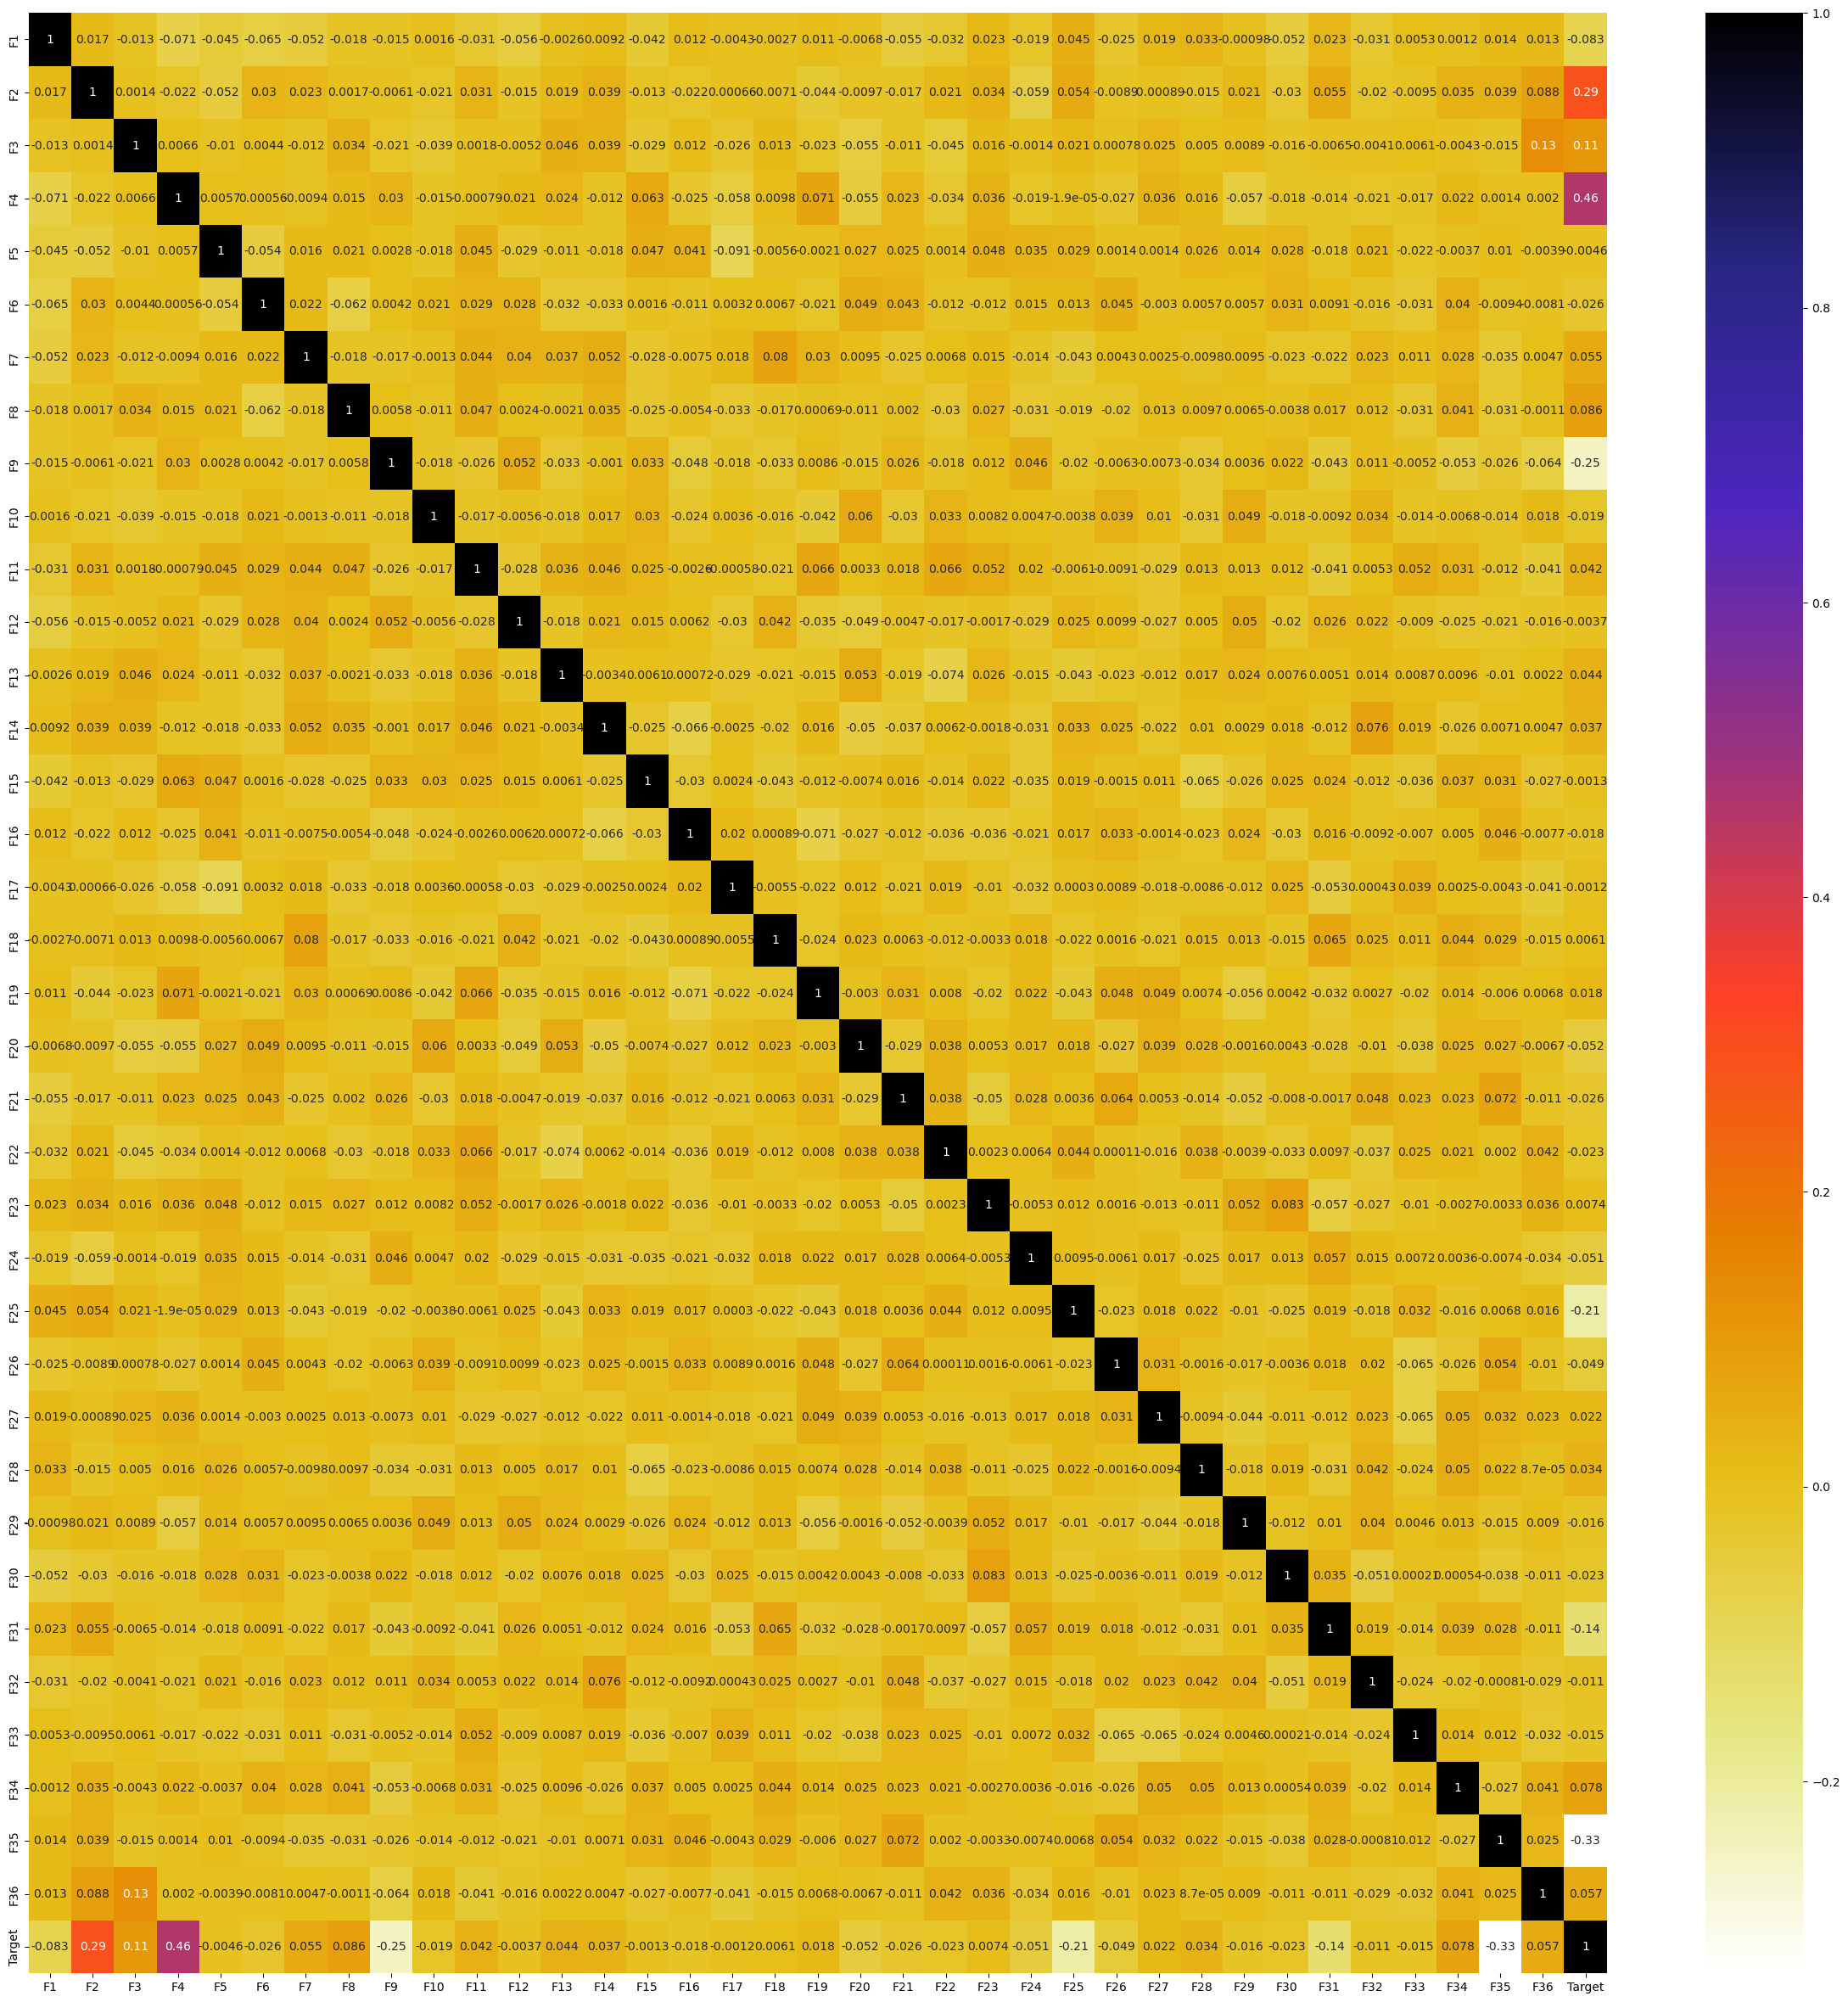

In [17]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [18]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

F1 Skewness: 0.05372413081001788


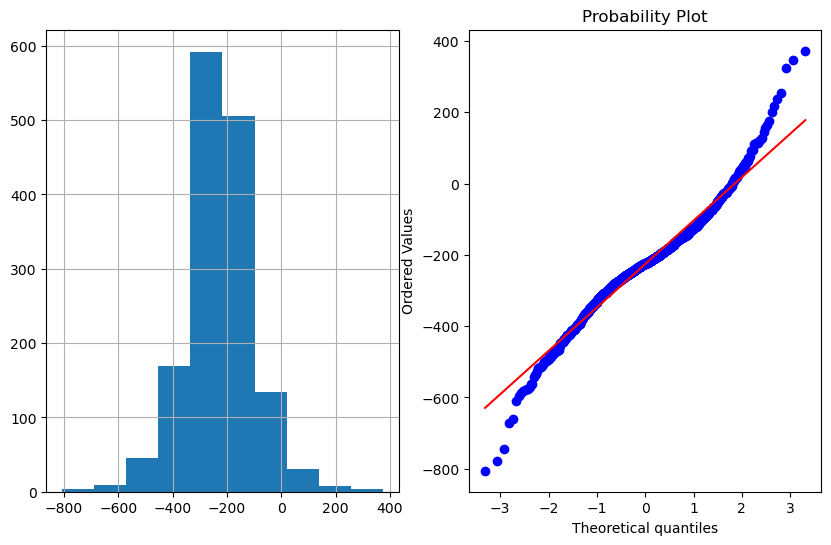

F2 Skewness: 0.09272636432040791


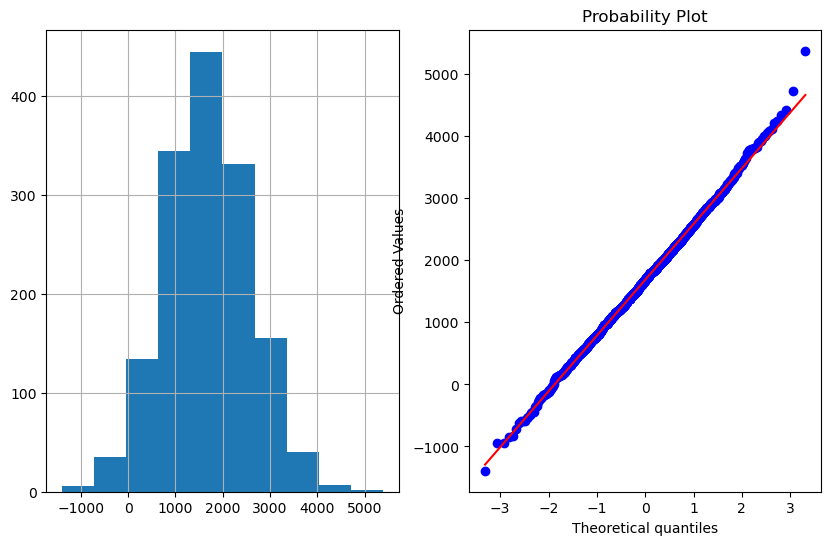

F3 Skewness: 24.324132247271585


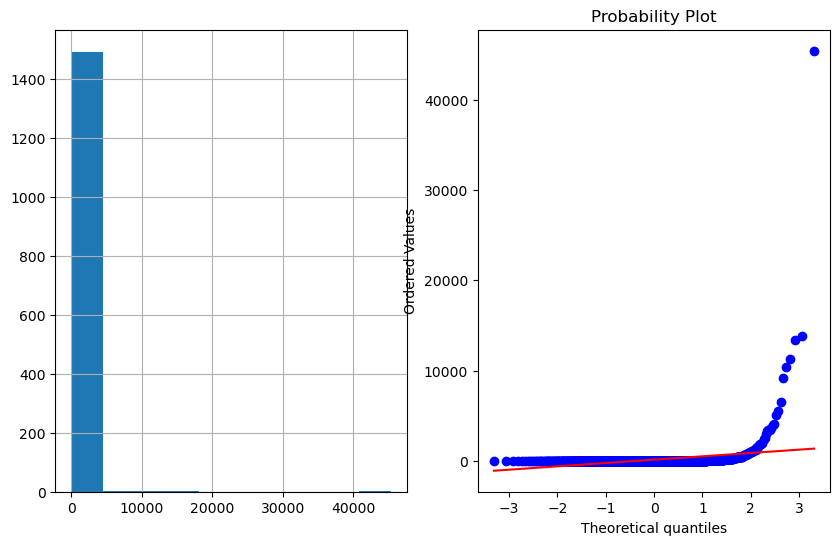

F4 Skewness: -1.3263828596771592


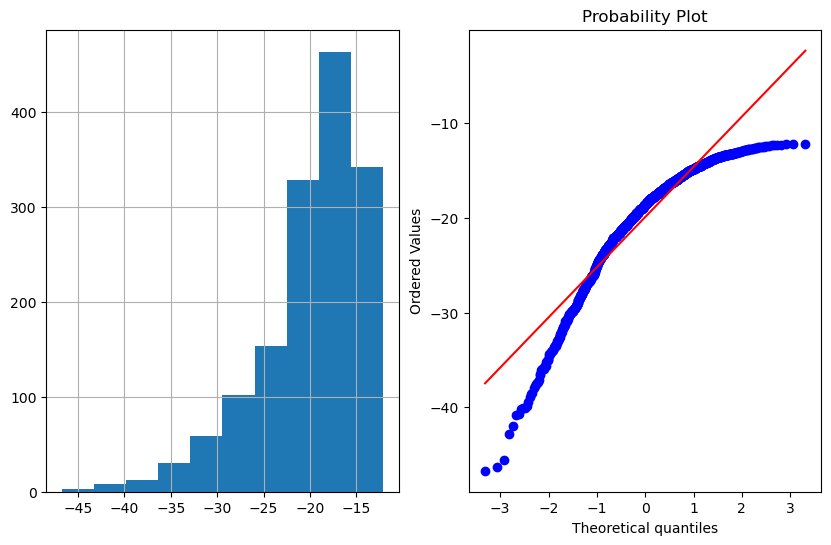

F5 Skewness: 0.03602587780726161


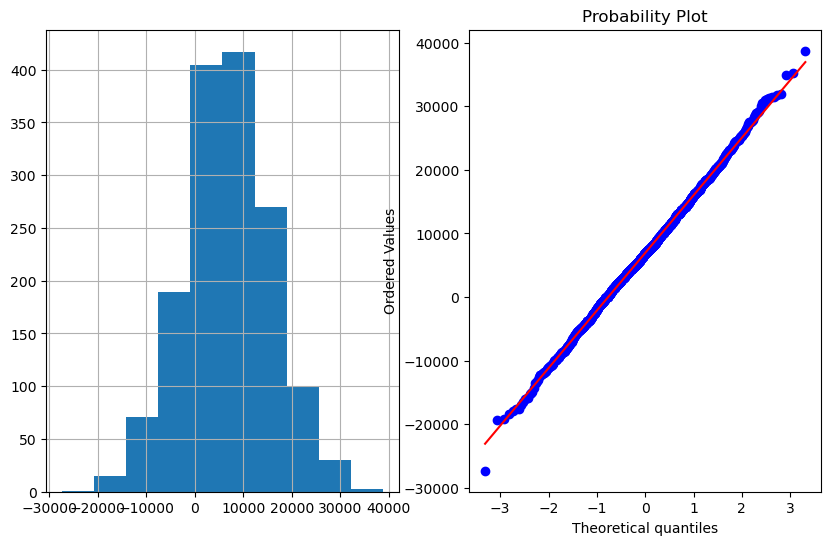

F6 Skewness: 0.018654613295884147


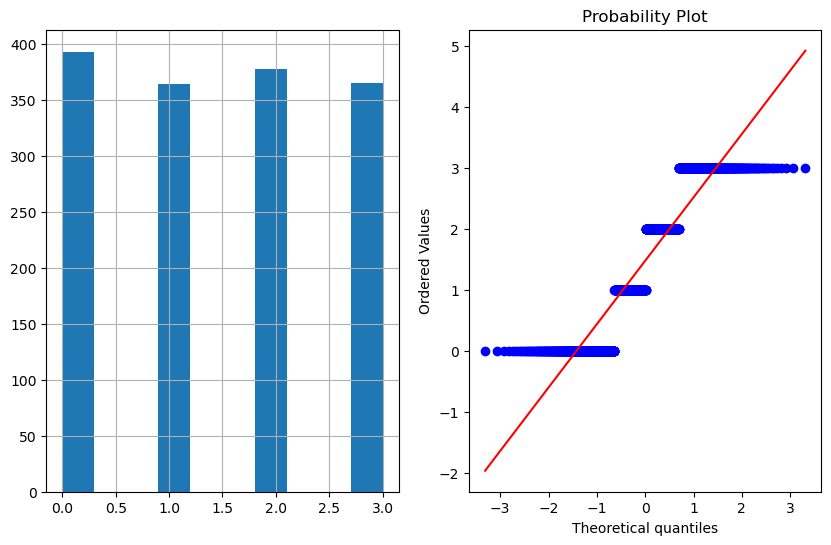

F7 Skewness: -0.03552447550955482


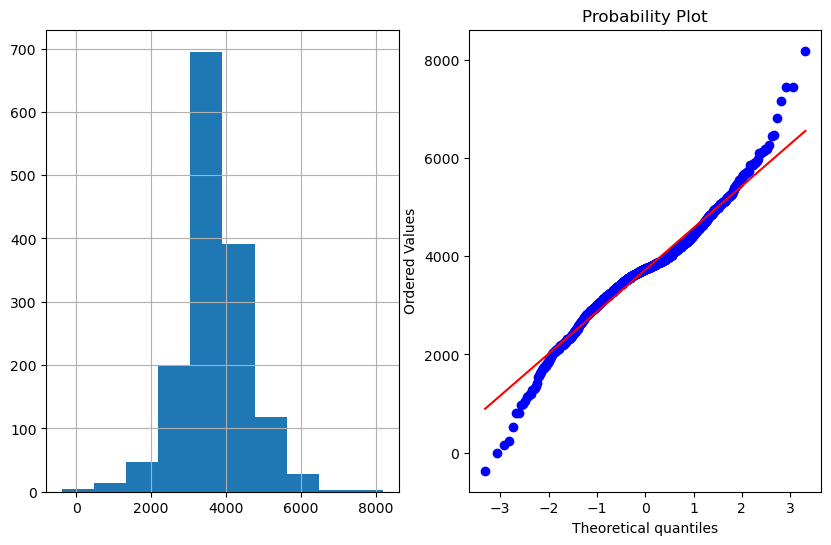

F8 Skewness: -0.07317028811549318


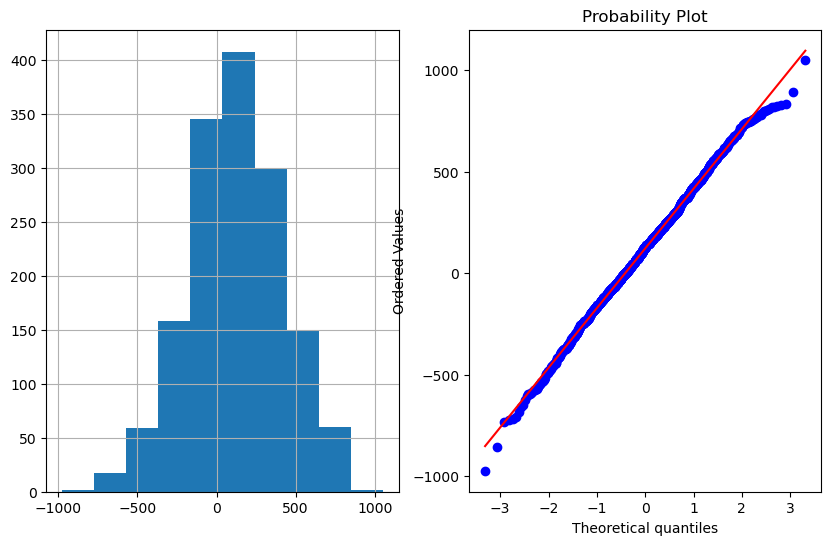

F9 Skewness: 0.01868117129824299


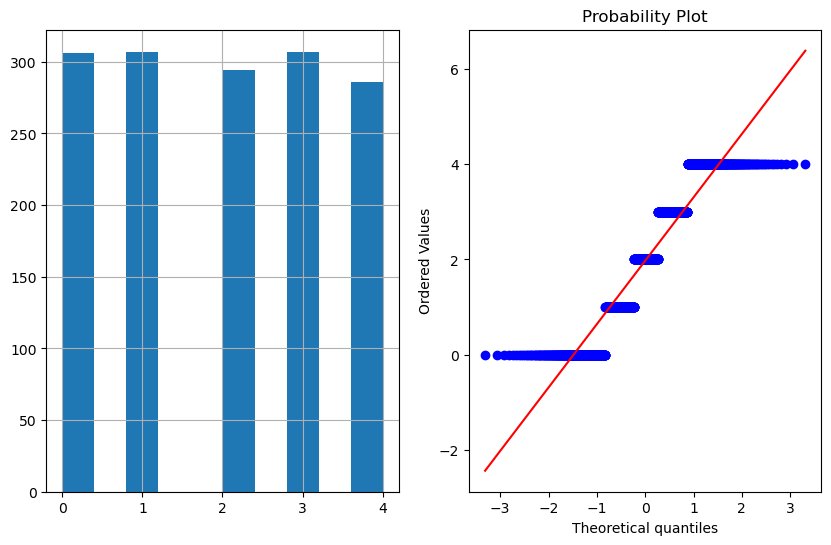

F10 Skewness: -0.3011384896841996


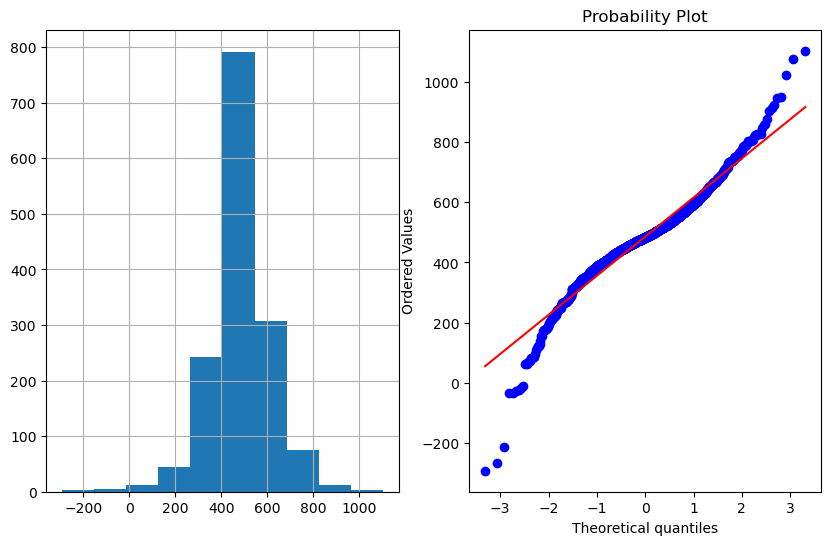

F11 Skewness: -0.036309183947368734


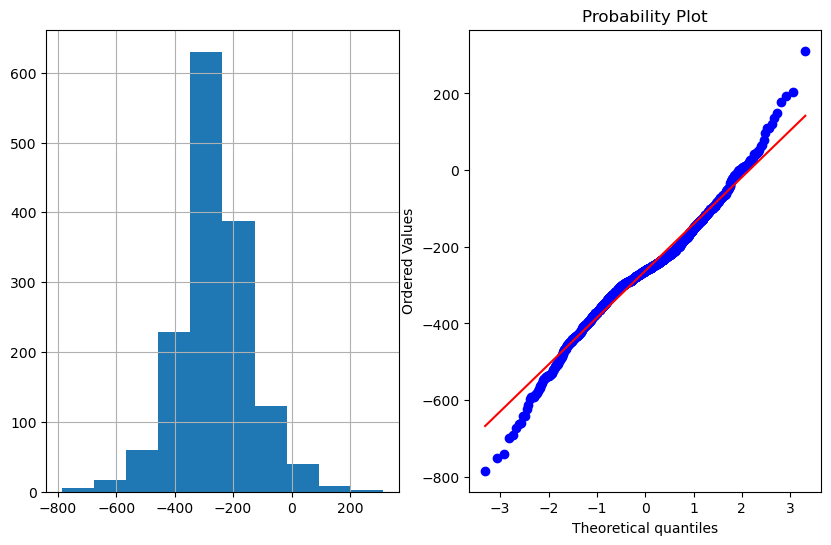

F12 Skewness: 0.001580221057936168


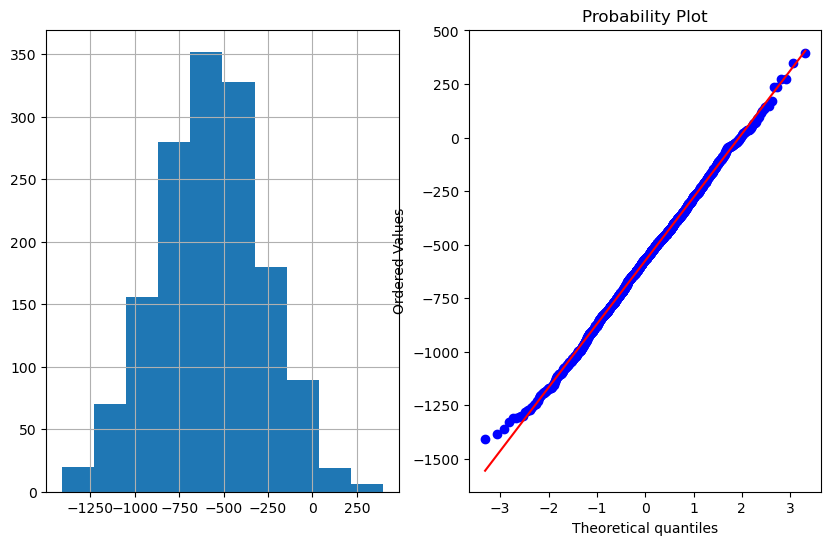

F13 Skewness: -0.07252907619229323


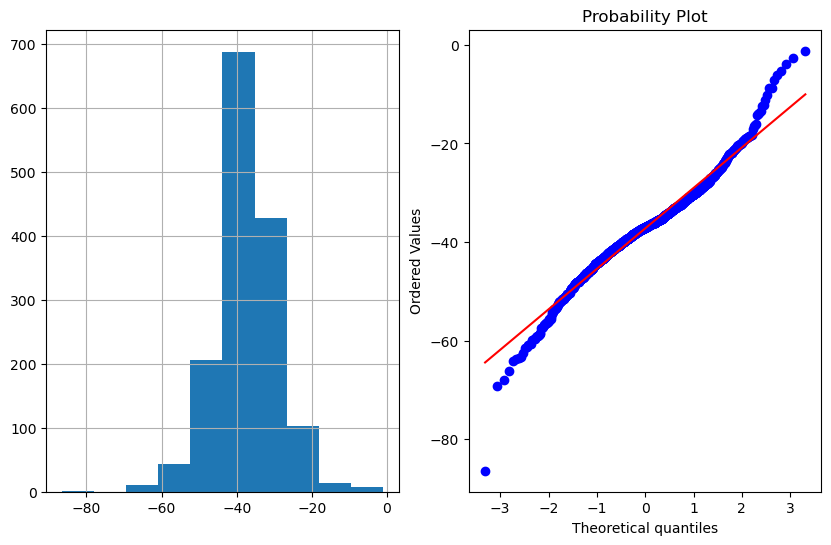

F14 Skewness: 0.07200139768445094


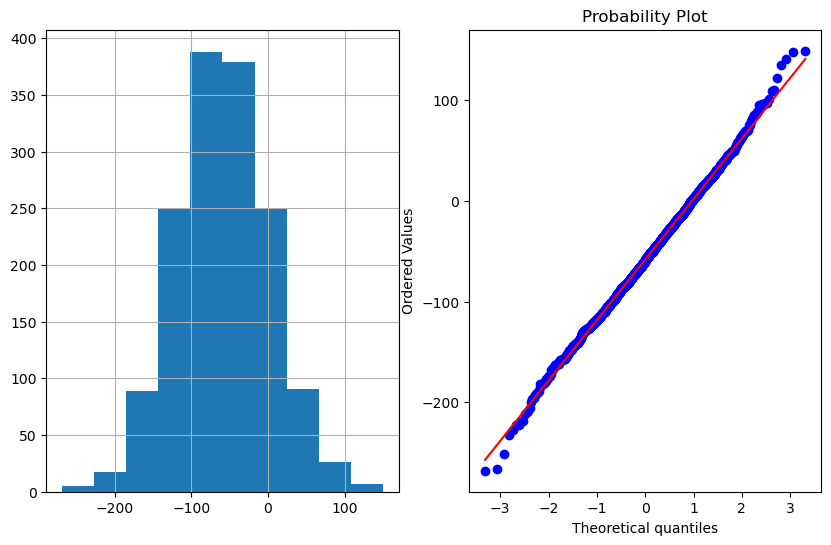

F15 Skewness: 0.06614826452868894


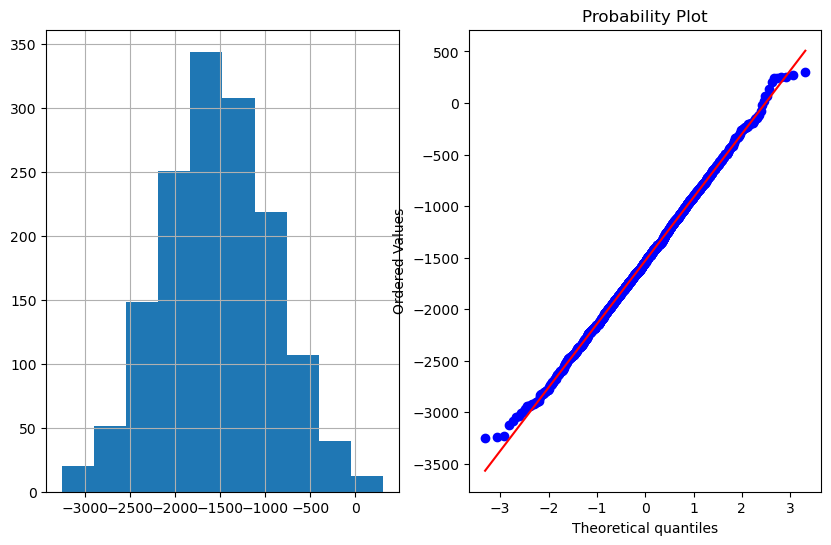

F16 Skewness: -0.039133046686299564


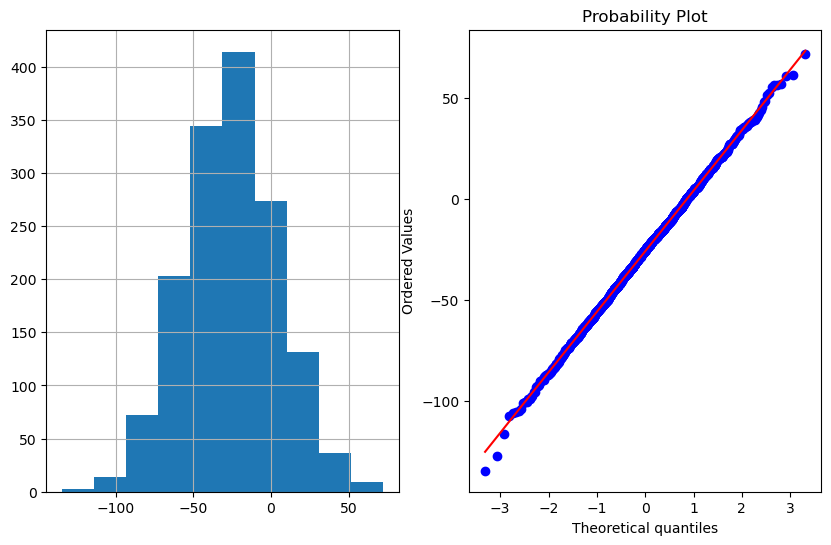

F17 Skewness: -0.02646704828961424


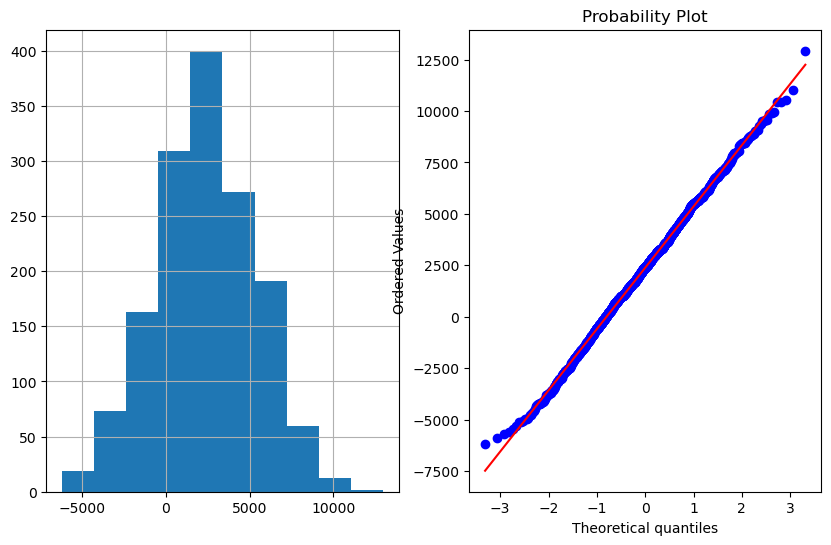

F18 Skewness: 0.09215730143538418


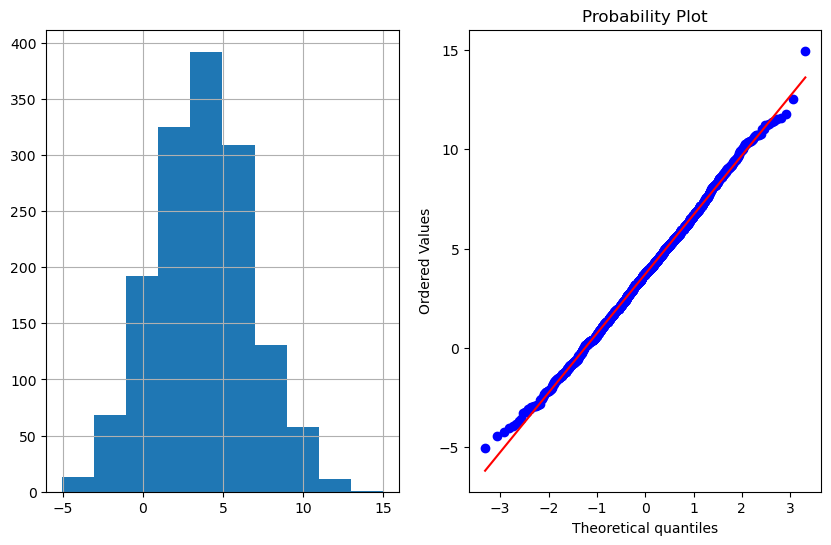

F19 Skewness: 0.06967641632443342


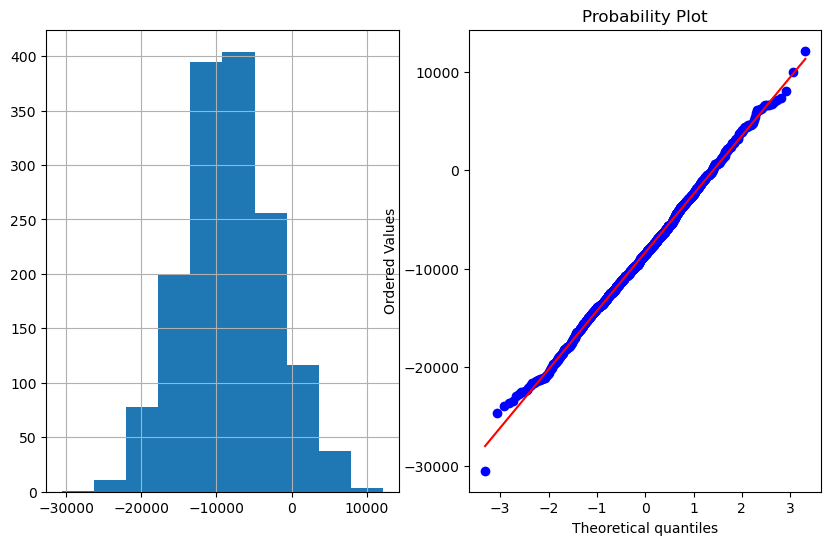

F20 Skewness: 0.01182729372976716


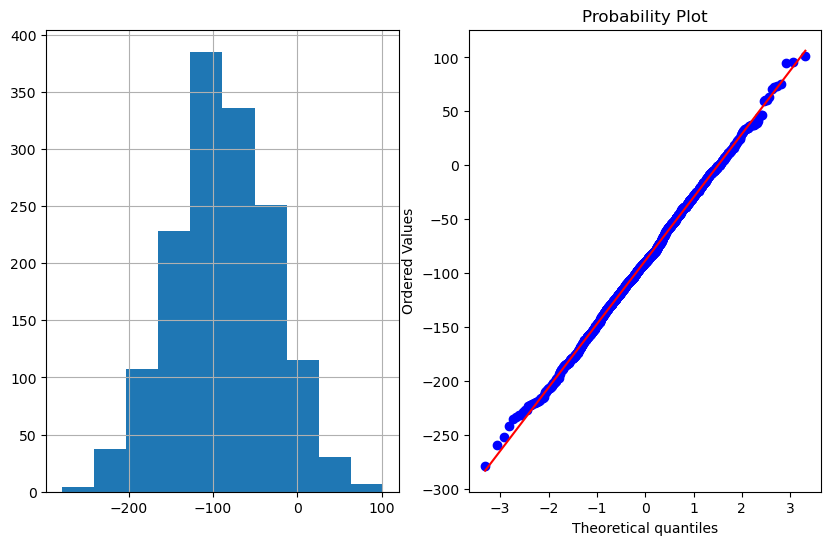

F21 Skewness: -0.05932710662573701


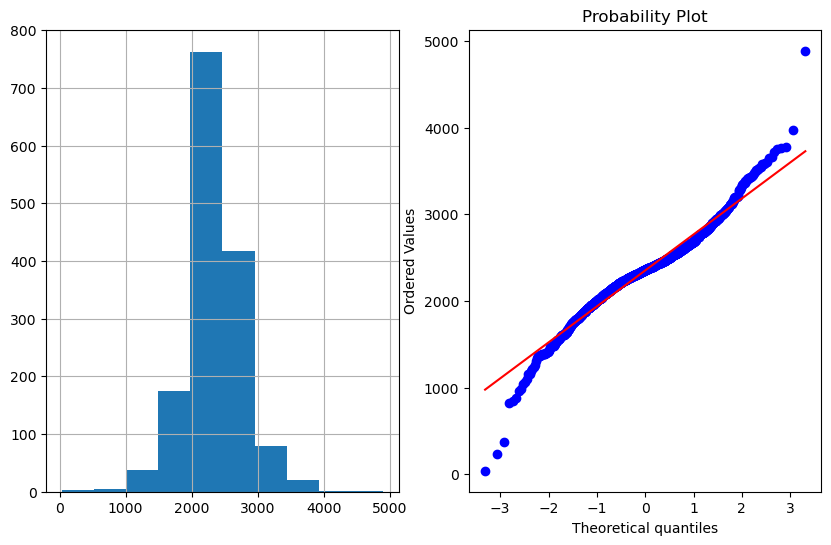

F22 Skewness: 0.10920241351014931


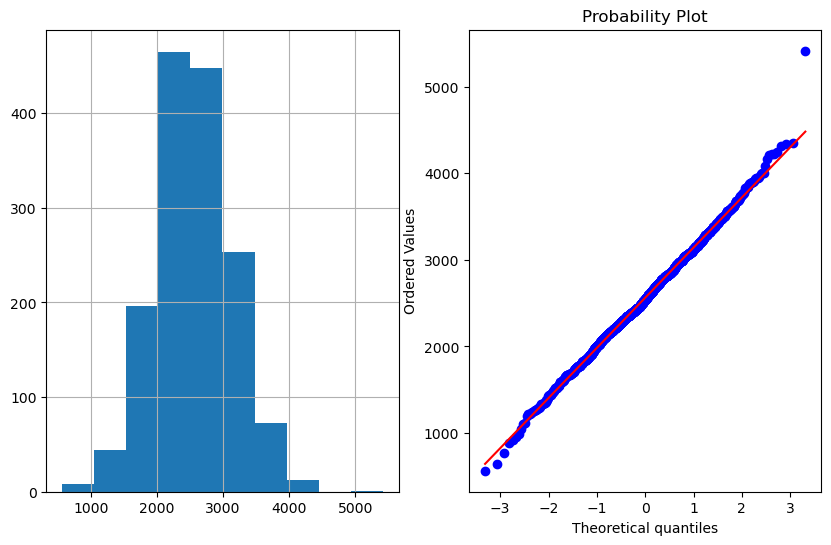

F23 Skewness: 1.325685079487136


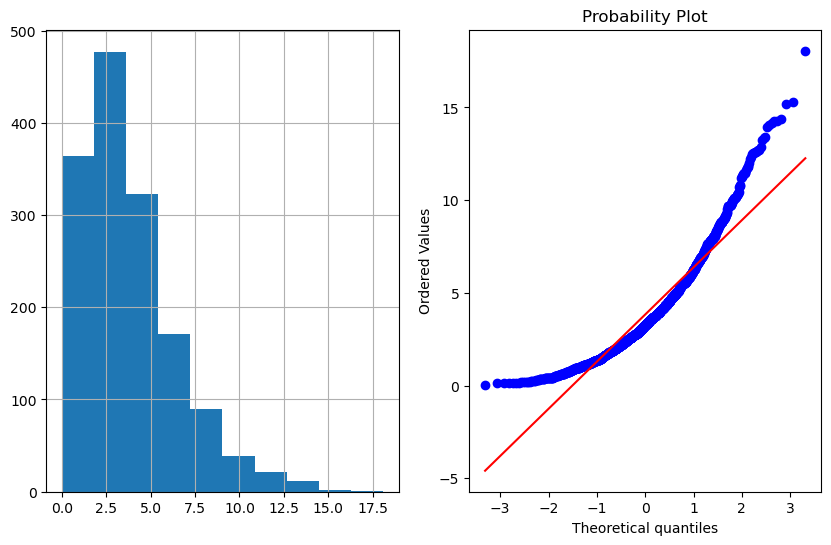

F24 Skewness: -0.30968094246636196


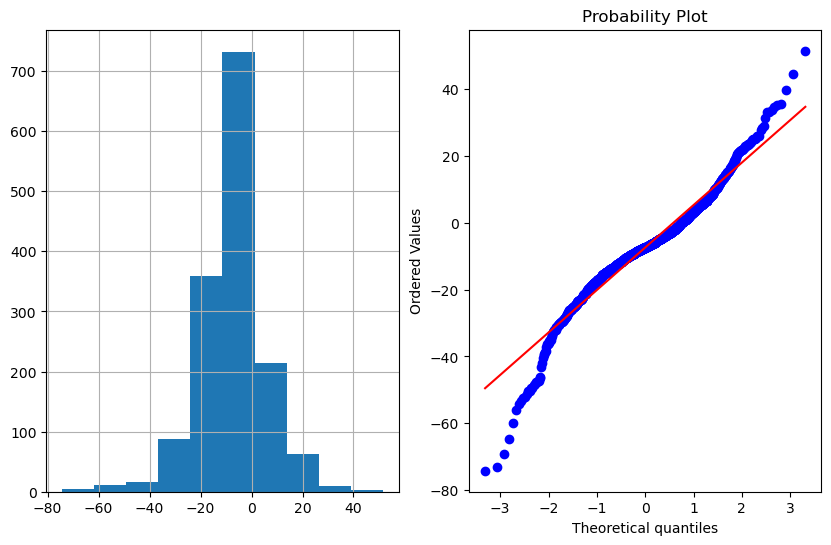

F25 Skewness: -0.010490963725543648


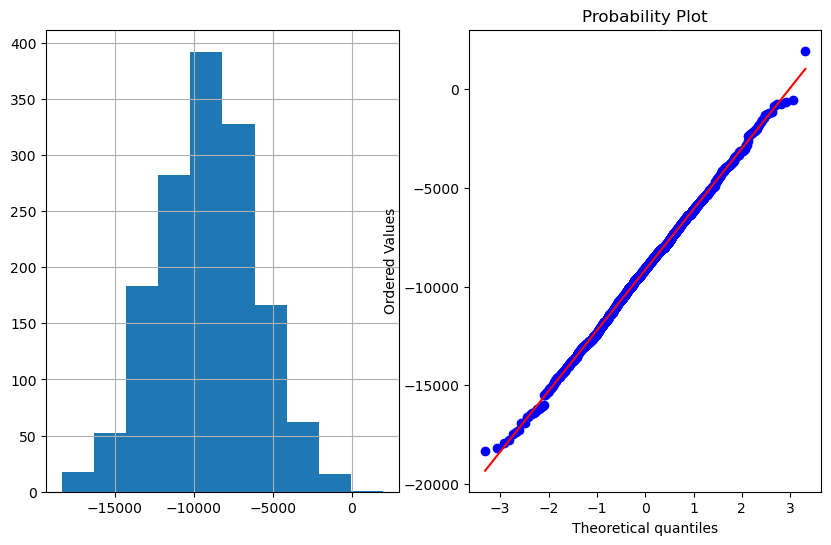

F26 Skewness: -0.06169442840060954


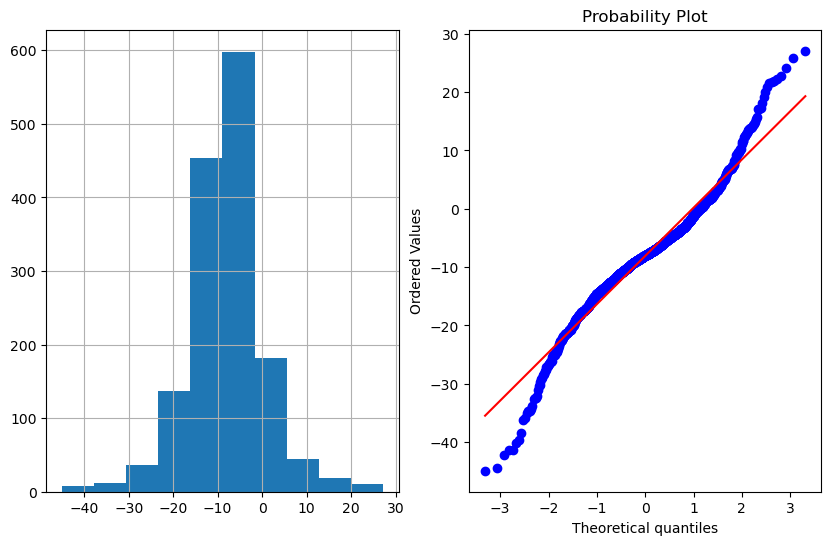

F27 Skewness: 0.4811515168987616


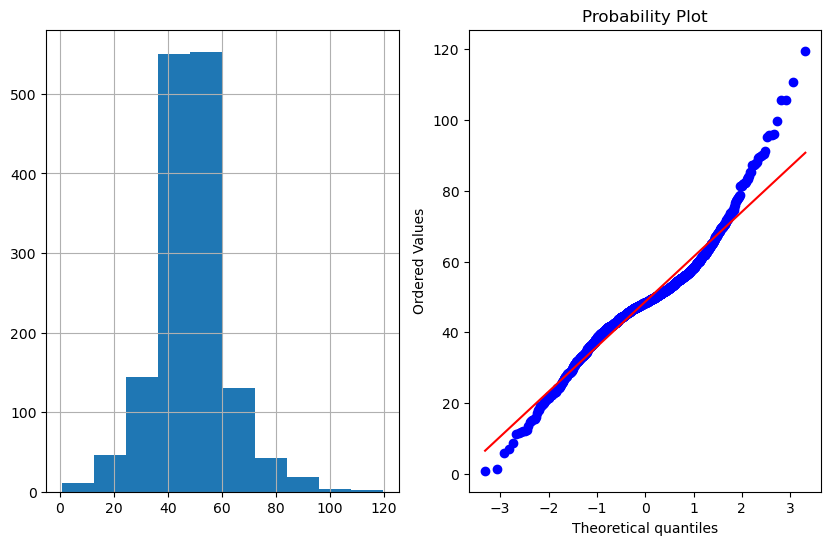

F28 Skewness: -0.09318797593558943


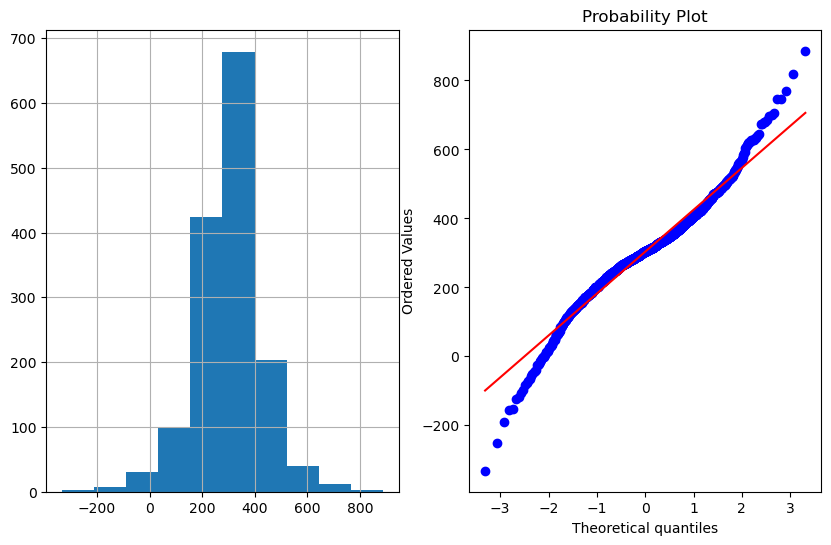

F29 Skewness: 0.03515186186510673


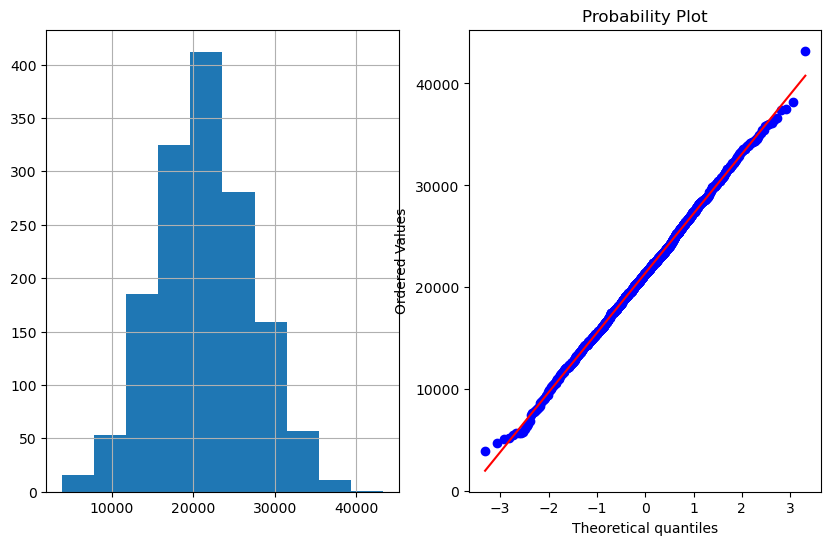

F30 Skewness: 0.09312891100401796


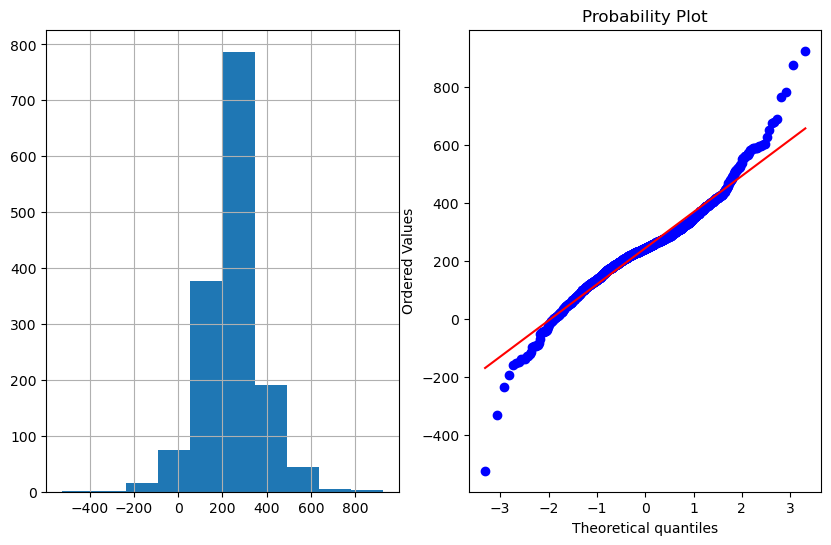

F31 Skewness: 0.23496048485247864


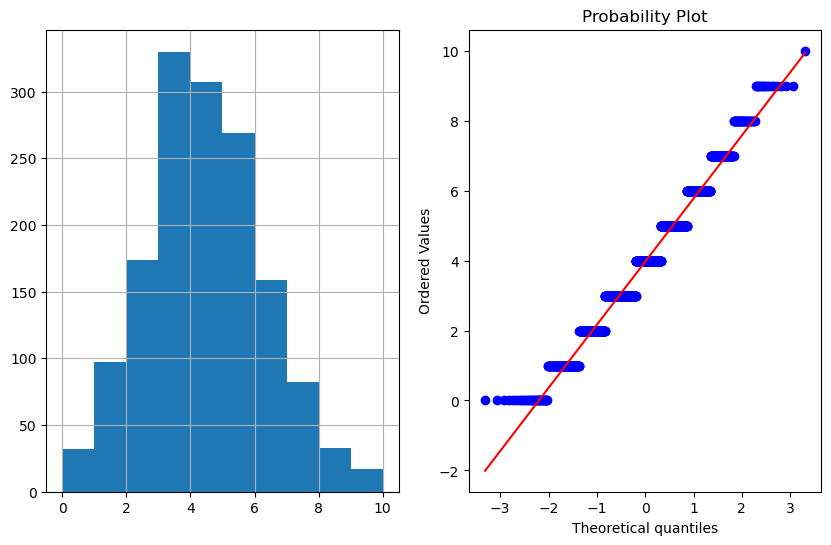

F32 Skewness: -0.13822302067410153


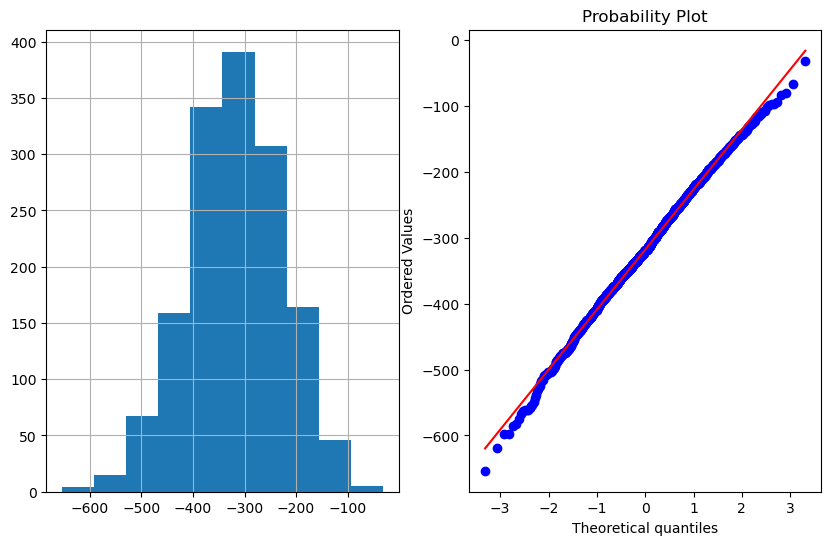

F33 Skewness: 0.05847155489206886


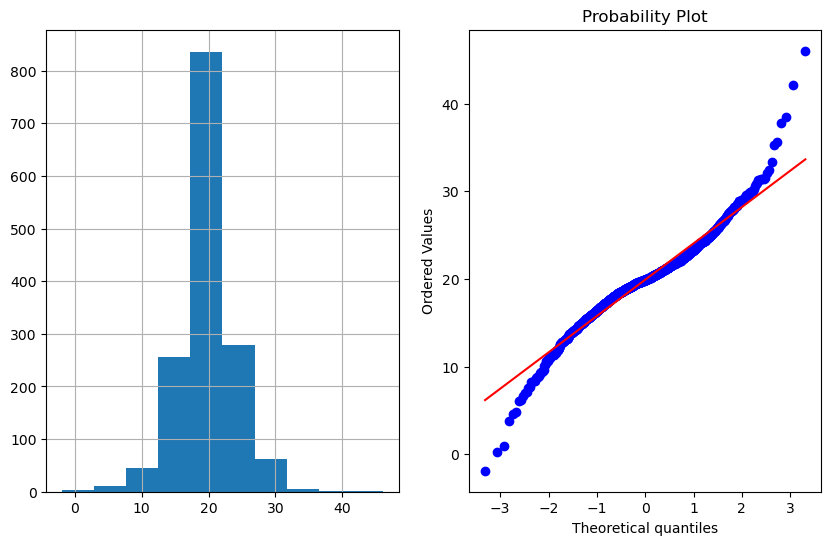

F34 Skewness: 0.03825546267793897


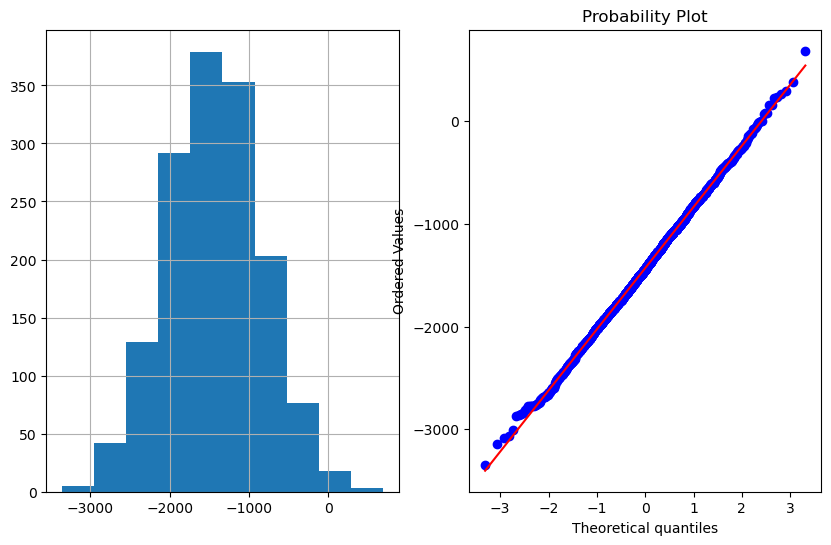

F35 Skewness: 0.2646012516797673


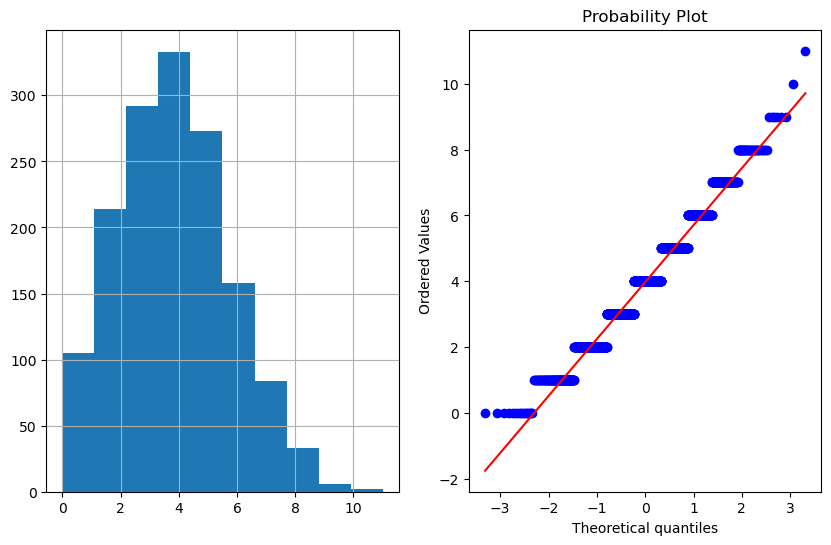

F36 Skewness: 0.0780590843405208


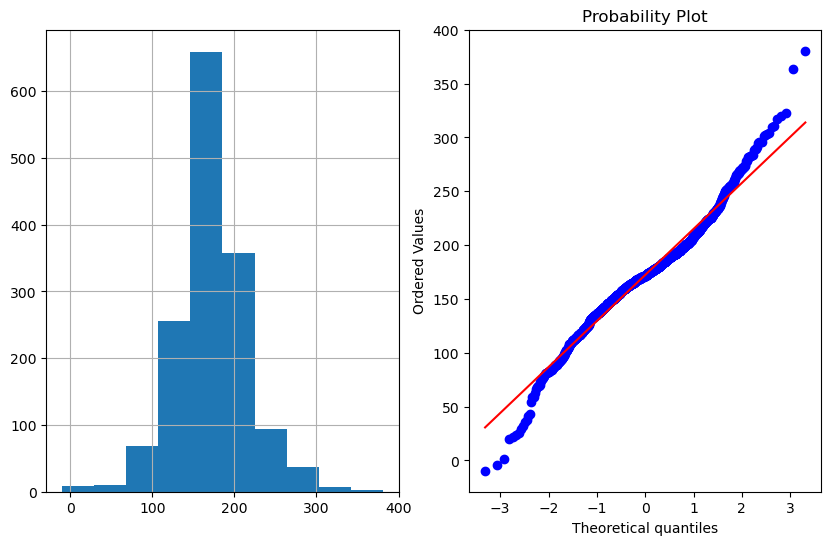

Target Skewness: 0.437688177328675


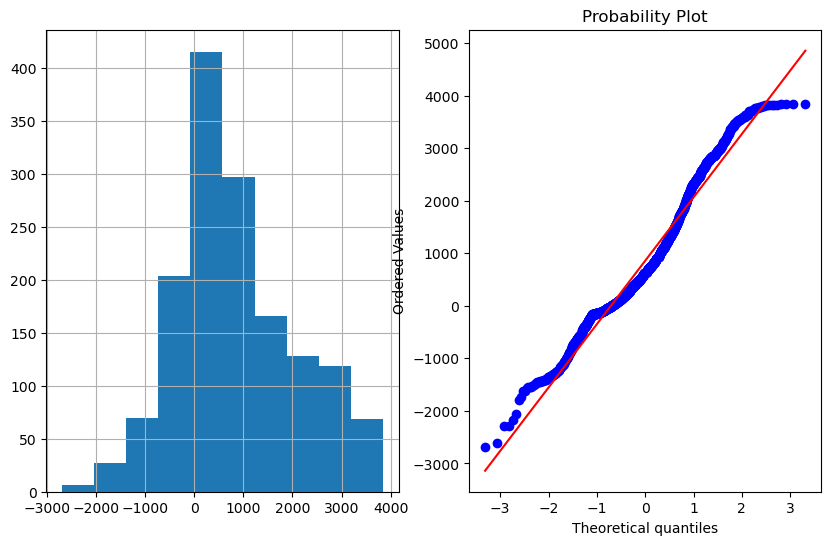

In [19]:
for col in df:
    print(col,'Skewness:',skew(df[col]))
    plot_data(df,col)
    plt.show()

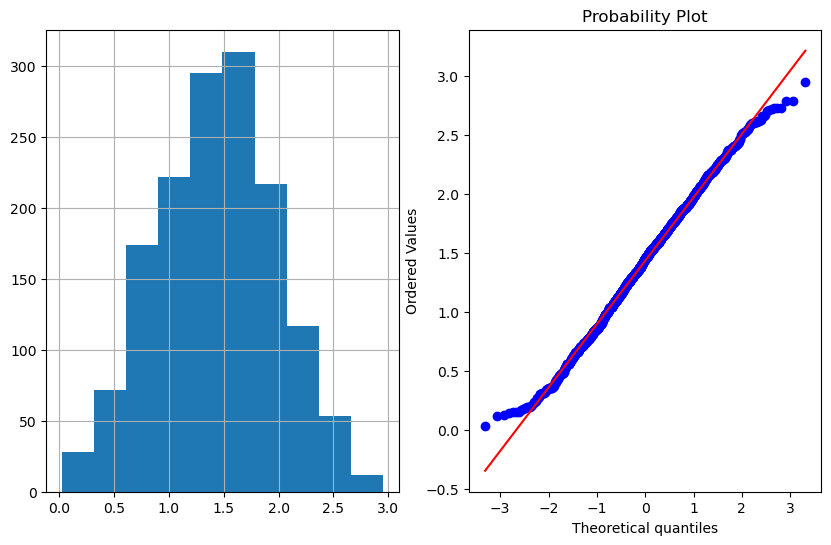

-0.03758273919135994


In [20]:
df['F23']=np.log1p(df['F23'])
plot_data(df,'F23')
print(df['F23'].skew())

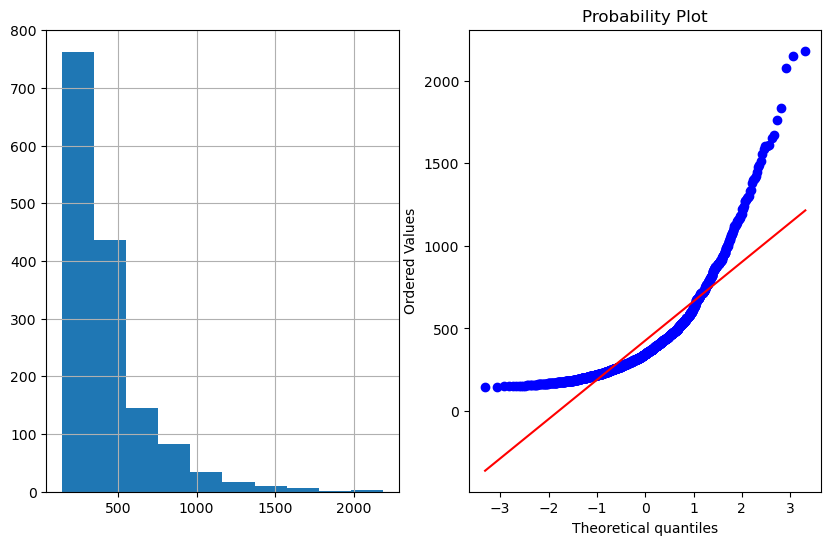

2.2279949839467132


In [21]:
df['F4']=np.square(df['F4'])
plot_data(df,'F4')
print(df['F4'].skew())

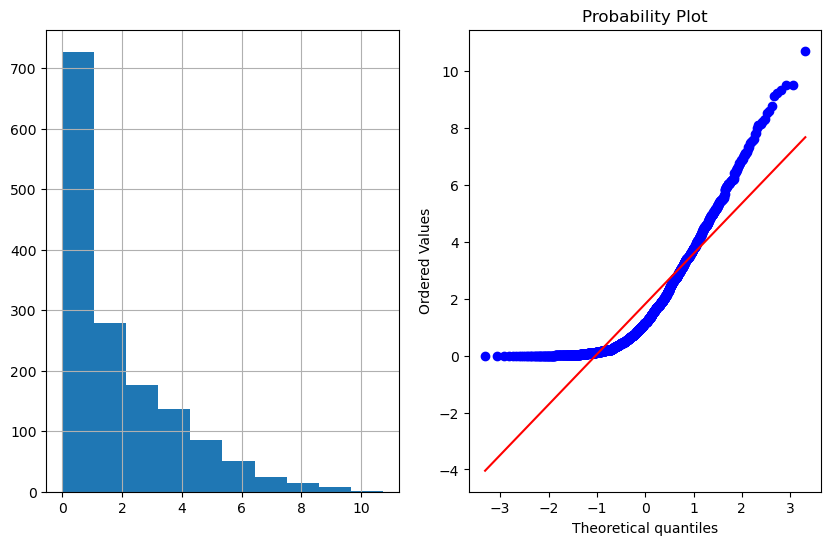

1.335960730807441


In [22]:
df['F3']=np.log1p(df['F3'])
plot_data(df,'F3')
print(df['F3'].skew())

BaseLine Model

In [23]:
Y  = df['Target']
X = df.drop("Target",axis = 1)

In [24]:
MM = MinMaxScaler()
X = pd.DataFrame(MM.fit_transform(X),columns=X.columns)
X 

F1        F2        F3        F4        F5        F6        F7  \
0     0.522470  0.234054  0.111899  0.161887  0.584447  0.000000  0.713439   
1     0.464901  0.491384  0.301499  0.166637  0.454690  0.000000  0.453617   
2     0.322215  0.363854  0.008888  0.161028  0.526649  0.333333  0.585034   
3     0.510274  0.432141  0.198683  0.085576  0.478132  0.666667  0.454333   
4     0.486849  0.402721  0.318647  0.121665  0.458153  0.666667  0.463222   
...        ...       ...       ...       ...       ...       ...       ...   
1495  0.556817  0.590456  0.318709  0.071098  0.407489  0.333333  0.444154   
1496  0.559389  0.000000  0.031377  0.159743  0.359317  0.666667  0.446197   
1497  0.732043  0.536085  0.330254  0.182518  0.605953  0.666667  0.529522   
1498  0.561400  0.482047  0.187644  0.070091  0.516820  1.000000  0.451073   
1499  0.272896  0.392165  0.180657  0.023401  0.708744  0.000000  0.474484   

            F8    F9       F10  ...       F27       F28       F29       F30  \
0     0.797220  0.00  0.544539  ...  0.461305  0.415815  0.510691  0.542214   
1     0.674101  0.25  0.491084  ...  0.558928  0.490255  0.194004  0.503121   
2     0.467356  0.50  0.371480  ...  0.390744  0.718182  0.619135  0.612891   
3     0.647319  0.00  0.863381  ...  0.436014  0.705172  0.445899  0.377424   
4     0.458432  0.75  0.640222  ...  0.487860  0.592958  0.359645  0.533296   
...        ...   ...       ...  ...       ...       ...       ...       ...   
1495  0.486896  0.25  0.552305  ...  0.580678  0.258409  0.196340  0.459881   
1496  0.603731  0.25  0.748080  ...  0.354831  0.514255  0.439510  0.599847   
1497  0.847577  0.00  0.574741  ...  0.267577  0.511569  0.565104  0.542628   
1498  0.629193  0.75  0.456386  ...  0.372281  0.506961  0.631010  0.543956   
1499  0.551486  0.50  0.446878  ...  0.409965  0.648252  0.429214  0.691035   

      F31       F32       F33       F34       F35       F36  
0     0.5  0.766384  0.406557  0.474206  0.363636  0.481312  
1     0.4  0.444021  0.379829  0.374305  0.636364  0.238631  
2     0.5  0.578950  0.407392  0.530941  0.454545  0.584722  
3     0.4  0.575524  0.465859  0.795303  0.545455  0.421174  
4     0.3  0.694045  0.443934  0.302767  0.363636  0.482774  
...   ...       ...       ...       ...       ...       ...  
1495  0.3  0.644581  0.436626  0.417896  0.363636  0.476057  
1496  0.5  0.538558  0.408854  0.220637  0.454545  0.484953  
1497  0.2  0.582618  0.440384  0.399926  0.363636  0.574314  
1498  0.6  0.706640  0.489037  0.673166  0.454545  0.671648  
1499  0.9  0.704420  0.276467  0.549139  0.090909  0.420405  

[1500 rows x 36 columns]

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [26]:
model_lr = XGBRegressor()
model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)
model_lr.score(x_test,y_test)



0.8091351087555074

In [27]:
#Feature importance gives us better interpretability of data.
dfff = pd.DataFrame({'Features Name':X.columns,'Importance Features':model_lr.feature_importances_})
dfff.sort_values(by='Importance Features',ascending=False)

Features Name  Importance Features
8             F9             0.173205
5             F6             0.149070
34           F35             0.147619
3             F4             0.143992
2             F3             0.103965
1             F2             0.062992
24           F25             0.059484
30           F31             0.036800
7             F8             0.011314
6             F7             0.009310
10           F11             0.007950
15           F16             0.007352
35           F36             0.006162
9            F10             0.005865
21           F22             0.005832
25           F26             0.005161
20           F21             0.005057
32           F33             0.004808
26           F27             0.004772
4             F5             0.004201
16           F17             0.004089
29           F30             0.003878
22           F23             0.003560
12           F13             0.003428
31           F32             0.003390
23           F24             0.003274
0             F1             0.003104
14           F15             0.002771
28           F29             0.002564
33           F34             0.002517
17           F18             0.002321
13           F14             0.002312
19           F20             0.002270
18           F19             0.001982
27           F28             0.001959
11           F12             0.001670

In [28]:
# Dropping irreltable column.
items = ['F1','F5','F7','F10','F11','F13','F14','F15','F16','F17','F18','F19','F20','F21','F22','F23','F24','F26','F28','F29','F30','F32','F33','F34']
x_train = x_train.drop(items,axis=True)
x_test = x_test.drop(items,axis=True)

In [29]:
x_test

F2        F3        F4        F6        F8    F9       F12  \
1425  0.302643  0.151195  0.060210  0.666667  0.769222  0.00  0.074443   
418   0.422405  0.013840  0.140074  0.000000  0.789863  0.50  0.497854   
860   0.546606  0.264967  0.278975  0.333333  0.658542  0.25  0.730632   
301   0.292694  0.108466  0.015326  0.333333  0.750345  0.75  0.337565   
250   0.520351  0.013840  0.282138  0.333333  0.556722  0.00  0.404032   
...        ...       ...       ...       ...       ...   ...       ...   
1146  0.331530  0.423232  0.074823  0.333333  0.315818  0.00  0.384437   
1430  0.516565  0.172518  0.284786  0.333333  0.423269  0.00  0.711326   
711   0.388268  0.010568  0.120494  0.333333  0.456736  0.75  0.336212   
1211  0.294361  0.055842  0.066427  0.000000  0.490322  0.25  0.574459   
909   0.526616  0.428822  0.072109  1.000000  0.603409  0.25  0.331814   

           F25       F27  F31       F35       F36  
1425  0.104958  0.503288  0.5  0.545455  0.224430  
418   0.627857  0.344967  0.6  0.363636  0.013971  
860   0.434589  0.419069  0.3  0.363636  0.440220  
301   0.508804  0.588771  0.5  0.272727  0.499744  
250   0.570287  0.372028  0.4  0.181818  0.485235  
...        ...       ...  ...       ...       ...  
1146  0.591917  0.486090  0.4  0.000000  0.252474  
1430  0.511569  0.384927  0.6  0.727273  0.318841  
711   0.521117  0.385938  0.3  0.454545  0.464548  
1211  0.315725  0.259990  0.5  0.181818  0.765342  
909   0.457006  0.452200  0.3  0.272727  0.552064  

[300 rows x 12 columns]

In [30]:
std = StandardScaler()
X_train = pd.DataFrame(std.fit_transform(x_train),columns=x_train.columns)
X_test = pd.DataFrame(std.fit_transform(x_test),columns=x_test.columns)


In [31]:
X_train

F2        F3        F4        F6        F8        F9       F12  \
0     1.477558  0.286416  0.004864  0.443054  0.249486  1.428528 -0.710033   
1    -1.432129 -0.822287 -0.563964  0.443054  0.945088 -0.689553 -1.031985   
2     1.863417 -0.923202 -0.763161 -0.449001  0.414143 -0.689553 -1.036122   
3     0.127835 -0.874878 -0.660161 -0.449001  0.147365 -0.689553 -0.298649   
4     0.081736 -0.332436 -0.581569  1.335110 -0.158894  0.016474 -0.122903   
...        ...       ...       ...       ...       ...       ...       ...   
1195  0.960320 -0.199362  1.936646  1.335110 -0.145390 -1.395580  0.352919   
1196 -1.523430 -0.913169 -0.507667  0.443054 -0.177724  0.016474 -0.659704   
1197  0.068298 -0.099777  0.139178 -0.449001 -0.049248  1.428528 -0.085292   
1198  1.000731 -0.752250  0.563254  0.443054 -1.724239 -0.689553  2.028335   
1199  1.059137  1.777697 -0.819072 -0.449001  1.594784  0.016474 -0.636235   

           F25       F27       F31       F35       F36  
0     0.486250  0.287961 -1.643579 -1.131683  0.963713  
1     1.044527 -0.993221 -0.547860 -0.560846 -0.352609  
2    -2.040526  0.596093 -1.095719 -1.131683  0.143112  
3     0.274807 -0.096625  0.547860  1.151662 -0.062749  
4    -0.904920 -0.001637 -1.095719 -1.131683  0.685683  
...        ...       ...       ...       ...       ...  
1195 -1.204235 -1.088209  1.643579 -1.131683  0.928456  
1196 -1.525592 -1.078942 -1.095719  0.009990  0.818191  
1197 -0.008273  0.023847  0.000000 -0.560846 -0.598932  
1198  2.133582  0.255526 -1.095719  1.151662 -0.444892  
1199 -0.696123 -0.527547  0.000000 -0.560846 -0.938483  

[1200 rows x 12 columns]

# 5.Machine Learning Model's

In [32]:
models_scaled = [
    #Ensemble Technique 
    AdaBoostRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    #ensemble.StackingRegressor(),
    #Linear Model
    BayesianRidge(),
    ElasticNet(),
    HuberRegressor(),
    Lasso(),
    LinearRegression(),
    PassiveAggressiveRegressor(),
    #tress
    DecisionTreeRegressor(),
]


MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in models_scaled:
    predicted = alg.fit(X_train, y_train)
    train_pred = predicted.predict(X_train)
    test_pred = predicted.predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train MSE'] = metrics.mean_squared_error(y_train, train_pred)
    MLA_compare.loc[row_index, 'MLA Test MSE'] = metrics.mean_squared_error(y_test, test_pred)
    MLA_compare.loc[row_index, 'MLA MAE'] = metrics.mean_absolute_error(y_test, test_pred)
    MLA_compare.loc[row_index, 'MLA RMSE'] = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
    MLA_compare.loc[row_index, 'MLA R2square'] = metrics.r2_score(y_test, test_pred)
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA R2square'], ascending = False, inplace = True)    
MLA_compare.reset_index(inplace=True,drop='index')
MLA_compare



MLA Name  MLA Train MSE   MLA Test MSE     MLA MAE  \
0    GradientBoostingRegressor   1.023876e+05  250997.665246  374.572063   
1          ExtraTreesRegressor   3.946664e-24  326553.289560  420.318807   
2        RandomForestRegressor   5.146589e+04  381243.247637  459.011726   
3             BaggingRegressor   7.256840e+04  425445.772715  496.282320   
4             LinearRegression   4.551005e+05  428585.058176  492.963101   
5                BayesianRidge   4.551208e+05  429098.370784  493.174004   
6                        Lasso   4.551121e+05  429138.916386  493.236780   
7               HuberRegressor   4.666255e+05  440929.633030  488.361700   
8   PassiveAggressiveRegressor   4.793439e+05  460884.882984  496.059756   
9            AdaBoostRegressor   4.737508e+05  556937.468182  626.126260   
10                  ElasticNet   5.778929e+05  575692.513954  579.457718   
11       DecisionTreeRegressor   0.000000e+00  899098.725706  700.236033   

      MLA RMSE  MLA R2square  
0   500.996672      0.828737  
1   571.448414      0.777183  
2   617.448984      0.739867  
3   652.262043      0.709706  
4   654.664080      0.707564  
5   655.056006      0.707214  
6   655.086953      0.707186  
7   664.025326      0.699141  
8   678.885029      0.685525  
9   746.282432      0.619986  
10  758.744037      0.607189  
11  948.208166      0.386519

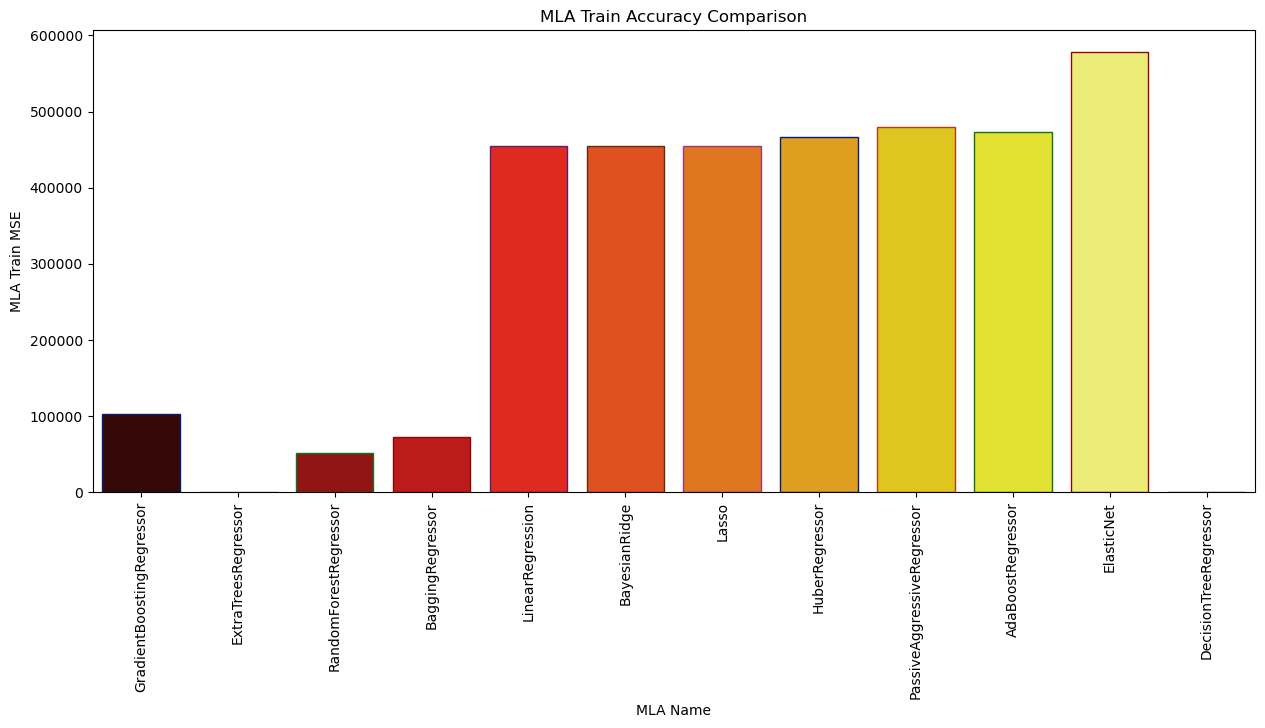

In [33]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train MSE",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

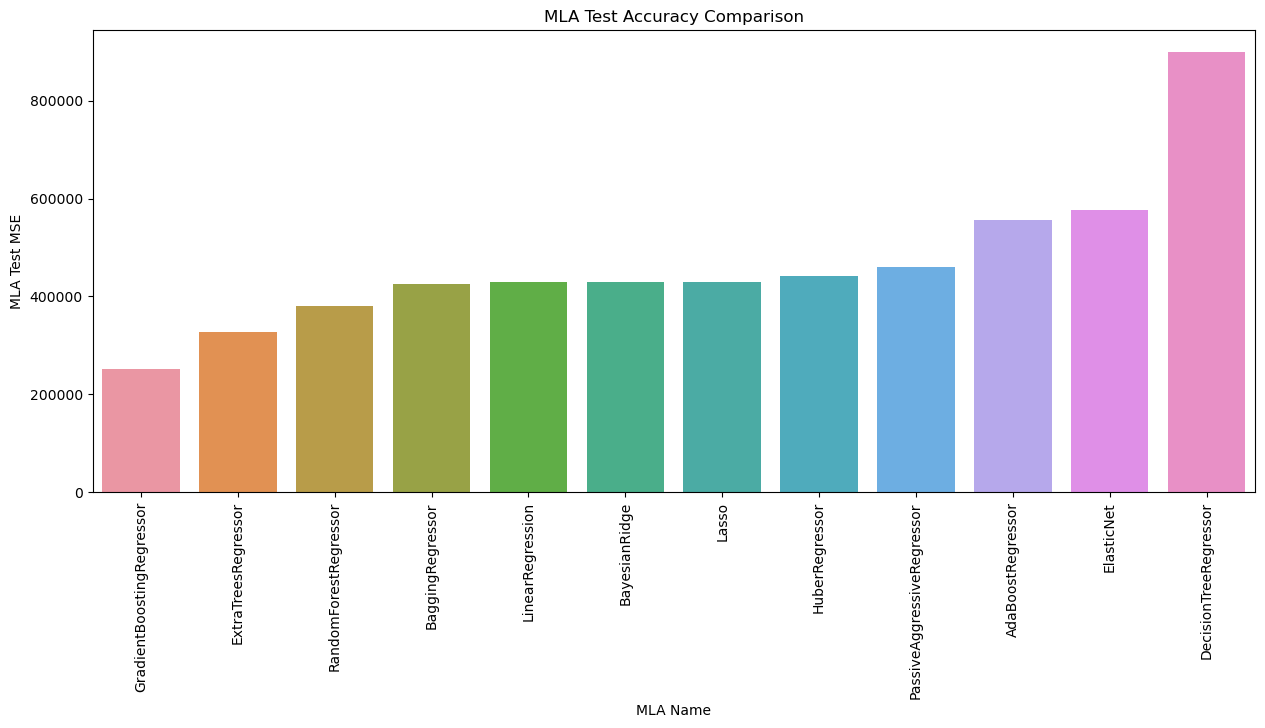

In [34]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test MSE",data=MLA_compare)
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

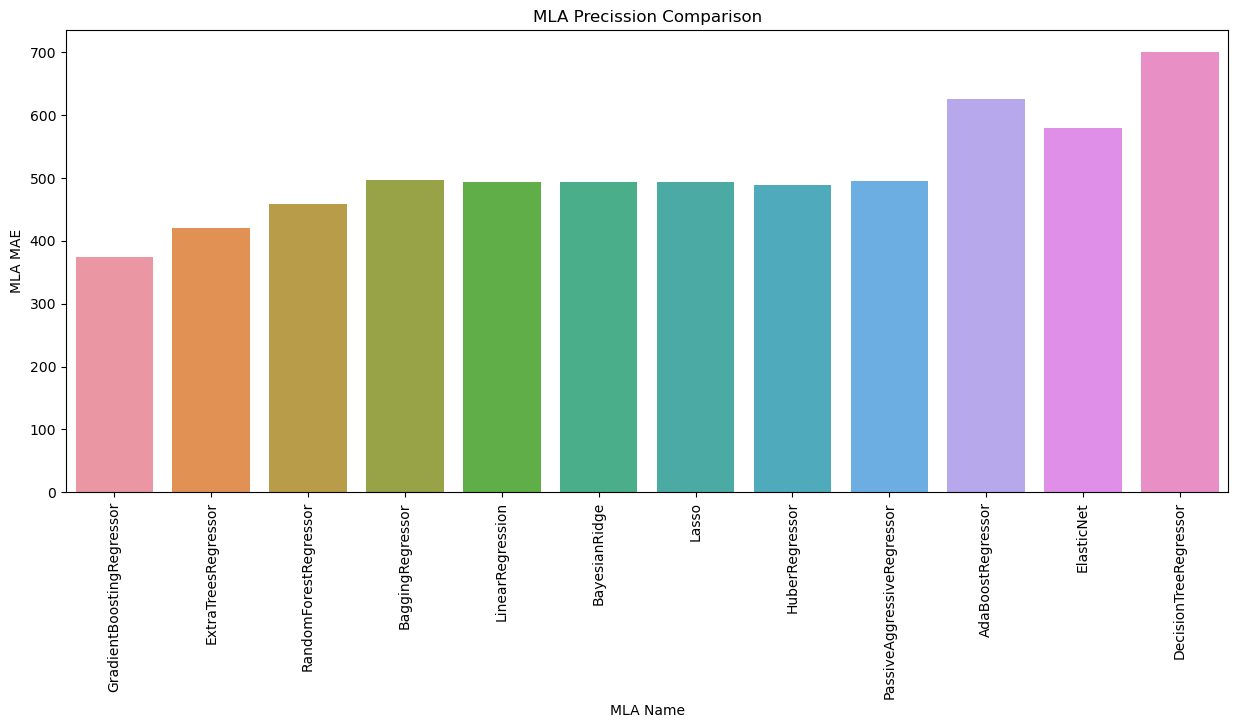

In [35]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA MAE",data=MLA_compare)
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

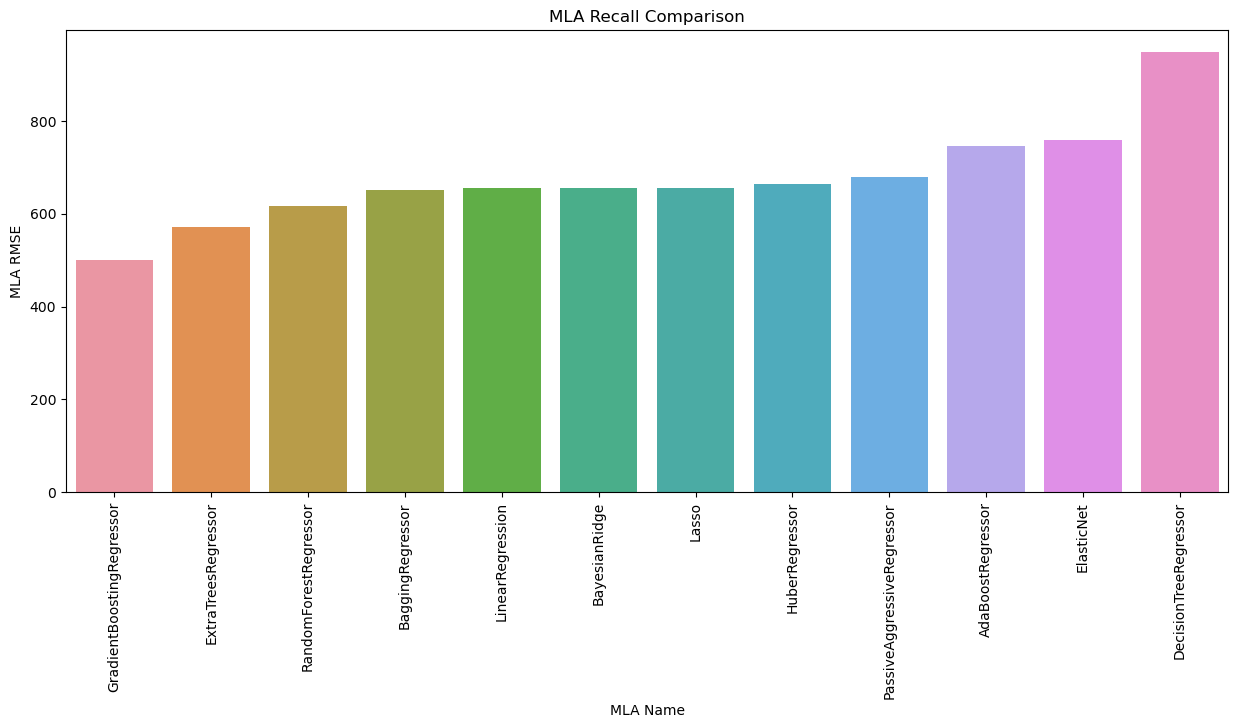

In [36]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA RMSE",data=MLA_compare)
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

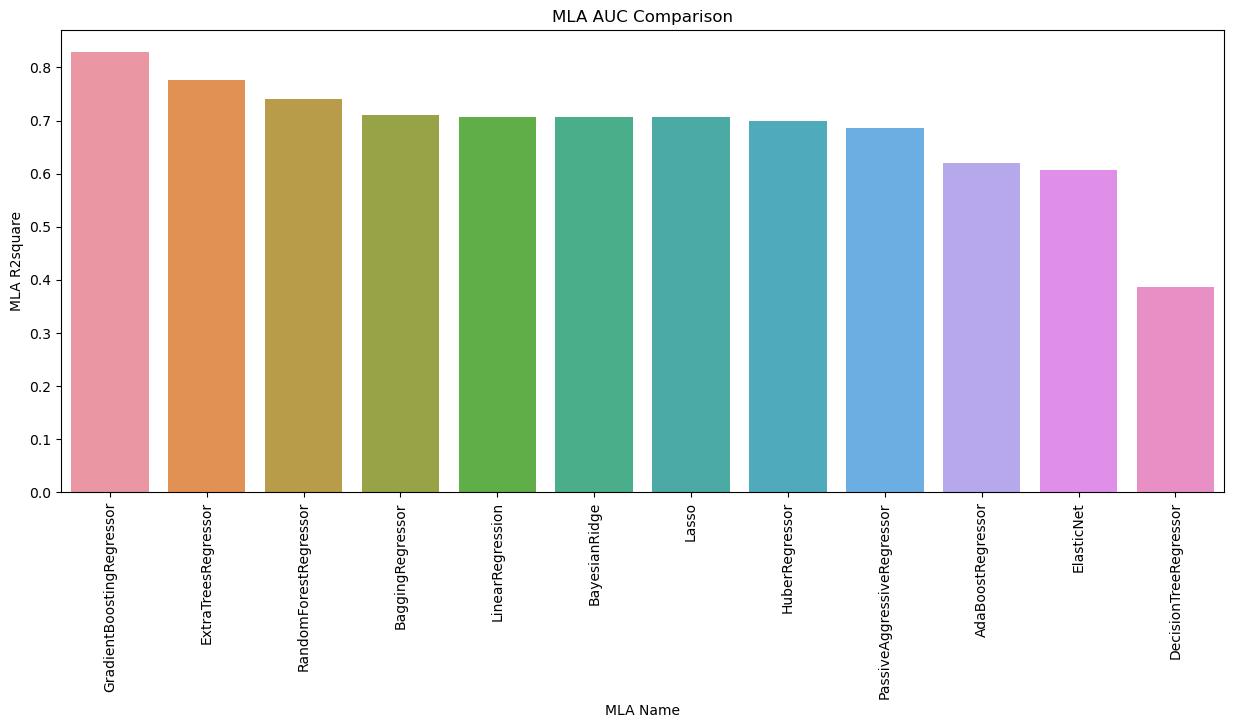

In [37]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA R2square",data=MLA_compare)
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

# Here, we are taking 1 algorithm out of 17 which has highest Accuracy to make a predection on the test data.

In [38]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')


GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
train_pred = GBR.predict(X_train)
test_pred = GBR.predict(X_test)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Train set evaluation:
_____________________________________
MAE: 250.83682877455357
MSE: 102387.58953913534
RMSE: 319.9806080673255
R2 Square 0.9318044938020895
__________________________________
Test set evaluation:
_____________________________________
MAE: 374.30070514870334
MSE: 250939.96308243435
RMSE: 500.9390812089174
R2 Square 0.8287765273348563
__________________________________


# 6.Saving the model 

In [39]:
import pickle

with open('model','wb') as f:
    pickle.dump(GBR,f)

In [40]:
# Load the pickled model
with open('model','rb') as f:
    model = pickle.load(f)

### Part B

# 7. Test Data

In [41]:
test_df = pd.read_csv('CE802_P3_Test.csv')
test_df

F1       F2         F3     F4        F5      F6       F7      F8  \
0     -72.18   995.49       0.60 -21.64 -13656.54    Rest  4748.60   40.72   
1    -229.68  2337.36       2.02 -17.90  12620.40     USA  3211.32 -140.38   
2    -402.24  2830.77       0.04 -35.14   -102.93      UK  3602.00  387.18   
3    -369.66  1331.07       7.36 -15.38  -1616.13      UK  3375.24  126.93   
4    -321.57  1511.70    3518.00 -29.04   4321.44     USA  5541.96   34.98   
...      ...      ...        ...    ...       ...     ...      ...     ...   
1495 -217.32  2996.94       0.10 -18.56   4109.49      UK  3201.72 -157.34   
1496 -397.50  1908.57       0.24 -20.78   4844.52    Rest  3507.28  226.12   
1497 -183.72  2215.83       3.56 -14.30  -1954.86  Europe  4490.90  500.26   
1498 -254.94   598.17       0.96 -16.08   5670.54    Rest  3295.42  364.05   
1499 -174.51   818.76  224929.74 -24.02  25689.90      UK  3843.04   18.85   

             F9     F10  ...     F28       F29     F30  F31     F32    F33  \
0          High  686.04  ...  364.17  16829.40  119.46    2 -244.62  17.19   
1      Very low  447.63  ...  279.09   7122.78  274.47    3 -440.55  16.79   
2           Low  379.98  ...  122.79  21703.32  258.99    5 -269.04  13.77   
3           Low  467.16  ...  216.78  33672.72  253.86    4 -312.69  11.74   
4      Very low  510.45  ...  348.81  15039.12  119.85    5 -415.77  16.55   
...         ...     ...  ...     ...       ...     ...  ...     ...    ...   
1495     Medium  488.10  ...  201.03  18926.82  174.06    4 -336.81  22.63   
1496       High  451.86  ...  226.74  24845.00  219.75    2 -366.21  25.27   
1497  Very high  421.89  ...  236.61  23839.86  254.19    5 -183.87  12.09   
1498        Low  560.52  ...  617.01  22592.04  271.26    2 -254.28  20.52   
1499   Very low  162.18  ...  327.00  12815.08  108.15    4 -190.02  16.74   

          F34  F35     F36  Target  
0    -1171.32    4  252.58     NaN  
1    -2247.80    2  132.25     NaN  
2    -1335.86    5  138.75     NaN  
3    -2744.98    4  182.63     NaN  
4     -408.02    5  165.61     NaN  
...       ...  ...     ...     ...  
1495 -1786.56    3  174.04     NaN  
1496 -1621.60    6  114.27     NaN  
1497  -890.46    4  223.96     NaN  
1498 -2383.38    1  176.55     NaN  
1499 -2001.94    2  178.09     NaN  

[1500 rows x 37 columns]

In [42]:
mapping = {'UK':0,'USA':1,'Rest':2,'Europe':3}
test_df['F6'] = test_df['F6'].replace(mapping)

In [43]:
mapping1 = {'Very high':0,'High':1,'Medium':2,'Very low':3,'Low':4}
test_df['F9'] = test_df['F9'].replace(mapping1,inplace=False)

In [44]:
print(test_df.shape)

(1500, 37)


In [45]:
test_df

F1       F2         F3     F4        F5  F6       F7      F8  F9  \
0     -72.18   995.49       0.60 -21.64 -13656.54   2  4748.60   40.72   1   
1    -229.68  2337.36       2.02 -17.90  12620.40   1  3211.32 -140.38   3   
2    -402.24  2830.77       0.04 -35.14   -102.93   0  3602.00  387.18   4   
3    -369.66  1331.07       7.36 -15.38  -1616.13   0  3375.24  126.93   4   
4    -321.57  1511.70    3518.00 -29.04   4321.44   1  5541.96   34.98   3   
...      ...      ...        ...    ...       ...  ..      ...     ...  ..   
1495 -217.32  2996.94       0.10 -18.56   4109.49   0  3201.72 -157.34   2   
1496 -397.50  1908.57       0.24 -20.78   4844.52   2  3507.28  226.12   1   
1497 -183.72  2215.83       3.56 -14.30  -1954.86   3  4490.90  500.26   0   
1498 -254.94   598.17       0.96 -16.08   5670.54   2  3295.42  364.05   4   
1499 -174.51   818.76  224929.74 -24.02  25689.90   0  3843.04   18.85   3   

         F10  ...     F28       F29     F30  F31     F32    F33      F34  F35  \
0     686.04  ...  364.17  16829.40  119.46    2 -244.62  17.19 -1171.32    4   
1     447.63  ...  279.09   7122.78  274.47    3 -440.55  16.79 -2247.80    2   
2     379.98  ...  122.79  21703.32  258.99    5 -269.04  13.77 -1335.86    5   
3     467.16  ...  216.78  33672.72  253.86    4 -312.69  11.74 -2744.98    4   
4     510.45  ...  348.81  15039.12  119.85    5 -415.77  16.55  -408.02    5   
...      ...  ...     ...       ...     ...  ...     ...    ...      ...  ...   
1495  488.10  ...  201.03  18926.82  174.06    4 -336.81  22.63 -1786.56    3   
1496  451.86  ...  226.74  24845.00  219.75    2 -366.21  25.27 -1621.60    6   
1497  421.89  ...  236.61  23839.86  254.19    5 -183.87  12.09  -890.46    4   
1498  560.52  ...  617.01  22592.04  271.26    2 -254.28  20.52 -2383.38    1   
1499  162.18  ...  327.00  12815.08  108.15    4 -190.02  16.74 -2001.94    2   

         F36  Target  
0     252.58     NaN  
1     132.25     NaN  
2     138.75     NaN  
3     182.63     NaN  
4     165.61     NaN  
...      ...     ...  
1495  174.04     NaN  
1496  114.27     NaN  
1497  223.96     NaN  
1498  176.55     NaN  
1499  178.09     NaN  

[1500 rows x 37 columns]

In [46]:
#Making a copy of original dataset's.
test_data = test_df.iloc[:,:-1].copy()

In [47]:
test_data

F1       F2         F3     F4        F5  F6       F7      F8  F9  \
0     -72.18   995.49       0.60 -21.64 -13656.54   2  4748.60   40.72   1   
1    -229.68  2337.36       2.02 -17.90  12620.40   1  3211.32 -140.38   3   
2    -402.24  2830.77       0.04 -35.14   -102.93   0  3602.00  387.18   4   
3    -369.66  1331.07       7.36 -15.38  -1616.13   0  3375.24  126.93   4   
4    -321.57  1511.70    3518.00 -29.04   4321.44   1  5541.96   34.98   3   
...      ...      ...        ...    ...       ...  ..      ...     ...  ..   
1495 -217.32  2996.94       0.10 -18.56   4109.49   0  3201.72 -157.34   2   
1496 -397.50  1908.57       0.24 -20.78   4844.52   2  3507.28  226.12   1   
1497 -183.72  2215.83       3.56 -14.30  -1954.86   3  4490.90  500.26   0   
1498 -254.94   598.17       0.96 -16.08   5670.54   2  3295.42  364.05   4   
1499 -174.51   818.76  224929.74 -24.02  25689.90   0  3843.04   18.85   3   

         F10  ...    F27     F28       F29     F30  F31     F32    F33  \
0     686.04  ...  48.87  364.17  16829.40  119.46    2 -244.62  17.19   
1     447.63  ...  47.46  279.09   7122.78  274.47    3 -440.55  16.79   
2     379.98  ...  50.88  122.79  21703.32  258.99    5 -269.04  13.77   
3     467.16  ...  41.91  216.78  33672.72  253.86    4 -312.69  11.74   
4     510.45  ...  33.48  348.81  15039.12  119.85    5 -415.77  16.55   
...      ...  ...    ...     ...       ...     ...  ...     ...    ...   
1495  488.10  ...  42.00  201.03  18926.82  174.06    4 -336.81  22.63   
1496  451.86  ...  43.86  226.74  24845.00  219.75    2 -366.21  25.27   
1497  421.89  ...  49.29  236.61  23839.86  254.19    5 -183.87  12.09   
1498  560.52  ...  55.89  617.01  22592.04  271.26    2 -254.28  20.52   
1499  162.18  ...  50.13  327.00  12815.08  108.15    4 -190.02  16.74   

          F34  F35     F36  
0    -1171.32    4  252.58  
1    -2247.80    2  132.25  
2    -1335.86    5  138.75  
3    -2744.98    4  182.63  
4     -408.02    5  165.61  
...       ...  ...     ...  
1495 -1786.56    3  174.04  
1496 -1621.60    6  114.27  
1497  -890.46    4  223.96  
1498 -2383.38    1  176.55  
1499 -2001.94    2  178.09  

[1500 rows x 36 columns]

In [48]:
items = ['F1','F5','F7','F10','F11','F13','F14','F15','F16','F17','F18','F19','F20','F21','F22','F23','F24','F26','F28','F29','F30','F32','F33','F34']
test_data = test_data.drop(items,axis=True)


In [49]:
test_data = std.fit_transform(test_data)
test_data

array([[-7.56220123e-01, -4.32395952e-02, -3.09626212e-01, ...,
        -1.10499297e+00,  1.30070307e-02,  1.84147728e+00],
       [ 6.86098298e-01, -4.29974408e-02,  3.57763959e-01, ...,
        -5.62087811e-01, -1.13467215e+00, -9.21241222e-01],
       [ 1.21644351e+00, -4.33350928e-02, -2.71865490e+00, ...,
         5.23722513e-01,  5.86846619e-01, -7.72004371e-01],
       ...,
       [ 5.55470921e-01, -4.27348226e-02,  1.00017161e+00, ...,
         5.23722513e-01,  1.30070307e-02,  1.18437594e+00],
       [-1.18328232e+00, -4.31782040e-02,  6.82536716e-01, ...,
        -1.10499297e+00, -1.70851173e+00,  9.58653140e-02],
       [-9.46179608e-01,  3.83142165e+01, -7.34329048e-01, ...,
        -1.91826491e-02, -1.13467215e+00,  1.31222968e-01]])

In [50]:
#Calling the save model to predict on the test_data.
y_final = model.predict(test_data)
test_df['Target'] = y_final.tolist()

In [51]:
test_df

F1       F2         F3     F4        F5  F6       F7      F8  F9  \
0     -72.18   995.49       0.60 -21.64 -13656.54   2  4748.60   40.72   1   
1    -229.68  2337.36       2.02 -17.90  12620.40   1  3211.32 -140.38   3   
2    -402.24  2830.77       0.04 -35.14   -102.93   0  3602.00  387.18   4   
3    -369.66  1331.07       7.36 -15.38  -1616.13   0  3375.24  126.93   4   
4    -321.57  1511.70    3518.00 -29.04   4321.44   1  5541.96   34.98   3   
...      ...      ...        ...    ...       ...  ..      ...     ...  ..   
1495 -217.32  2996.94       0.10 -18.56   4109.49   0  3201.72 -157.34   2   
1496 -397.50  1908.57       0.24 -20.78   4844.52   2  3507.28  226.12   1   
1497 -183.72  2215.83       3.56 -14.30  -1954.86   3  4490.90  500.26   0   
1498 -254.94   598.17       0.96 -16.08   5670.54   2  3295.42  364.05   4   
1499 -174.51   818.76  224929.74 -24.02  25689.90   0  3843.04   18.85   3   

         F10  ...     F28       F29     F30  F31     F32    F33      F34  F35  \
0     686.04  ...  364.17  16829.40  119.46    2 -244.62  17.19 -1171.32    4   
1     447.63  ...  279.09   7122.78  274.47    3 -440.55  16.79 -2247.80    2   
2     379.98  ...  122.79  21703.32  258.99    5 -269.04  13.77 -1335.86    5   
3     467.16  ...  216.78  33672.72  253.86    4 -312.69  11.74 -2744.98    4   
4     510.45  ...  348.81  15039.12  119.85    5 -415.77  16.55  -408.02    5   
...      ...  ...     ...       ...     ...  ...     ...    ...      ...  ...   
1495  488.10  ...  201.03  18926.82  174.06    4 -336.81  22.63 -1786.56    3   
1496  451.86  ...  226.74  24845.00  219.75    2 -366.21  25.27 -1621.60    6   
1497  421.89  ...  236.61  23839.86  254.19    5 -183.87  12.09  -890.46    4   
1498  560.52  ...  617.01  22592.04  271.26    2 -254.28  20.52 -2383.38    1   
1499  162.18  ...  327.00  12815.08  108.15    4 -190.02  16.74 -2001.94    2   

         F36       Target  
0     252.58  1673.902776  
1     132.25   805.335162  
2     138.75  1586.834023  
3     182.63  -388.480203  
4     165.61  1214.011868  
...      ...          ...  
1495  174.04  1498.176276  
1496  114.27  1741.864033  
1497  223.96   361.788524  
1498  176.55   500.466285  
1499  178.09  1881.923273  

[1500 rows x 37 columns]

In [52]:
# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')